# Import Library

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
#from xgboost import XGBRegressor

%matplotlib inline

# 2.0 Data Understanding

In [2]:
# Read the dataset
diamonds_ori = pd.read_csv("diamonds.csv")
diamonds_ori.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


In [3]:
# Features of Diamond (Cut, Clarity, Color, Carat)
Image(url='https://customjewelry.co.za/wp-content/uploads/2019/02/4Cs.jpg')

In [4]:
Image(url='https://www.brownsfamilyjewellers.co.uk/media/wysiwyg/Anatomy.jpeg')

In [5]:
diamonds_ori.shape
# The original dataset has 53940 rows and 10 columns 

(53940, 10)

In [6]:
diamonds_ori.info()
# Dependent variable = price 
# Categorical type   = cut   , colour, clarity
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [7]:
diamonds_ori.describe()

,carat,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
diamonds_ori['price'].max()

18823.0

In [9]:
diamonds_ori['price'].min()

326.0

<AxesSubplot:xlabel='price', ylabel='cut'>

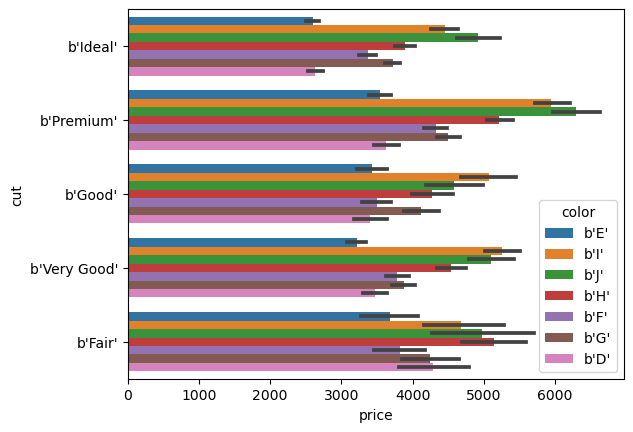

In [10]:
sns.barplot(data = diamonds_ori, x="price", y="cut", hue="color")
# Price highest for premium & usually highest for b'j'

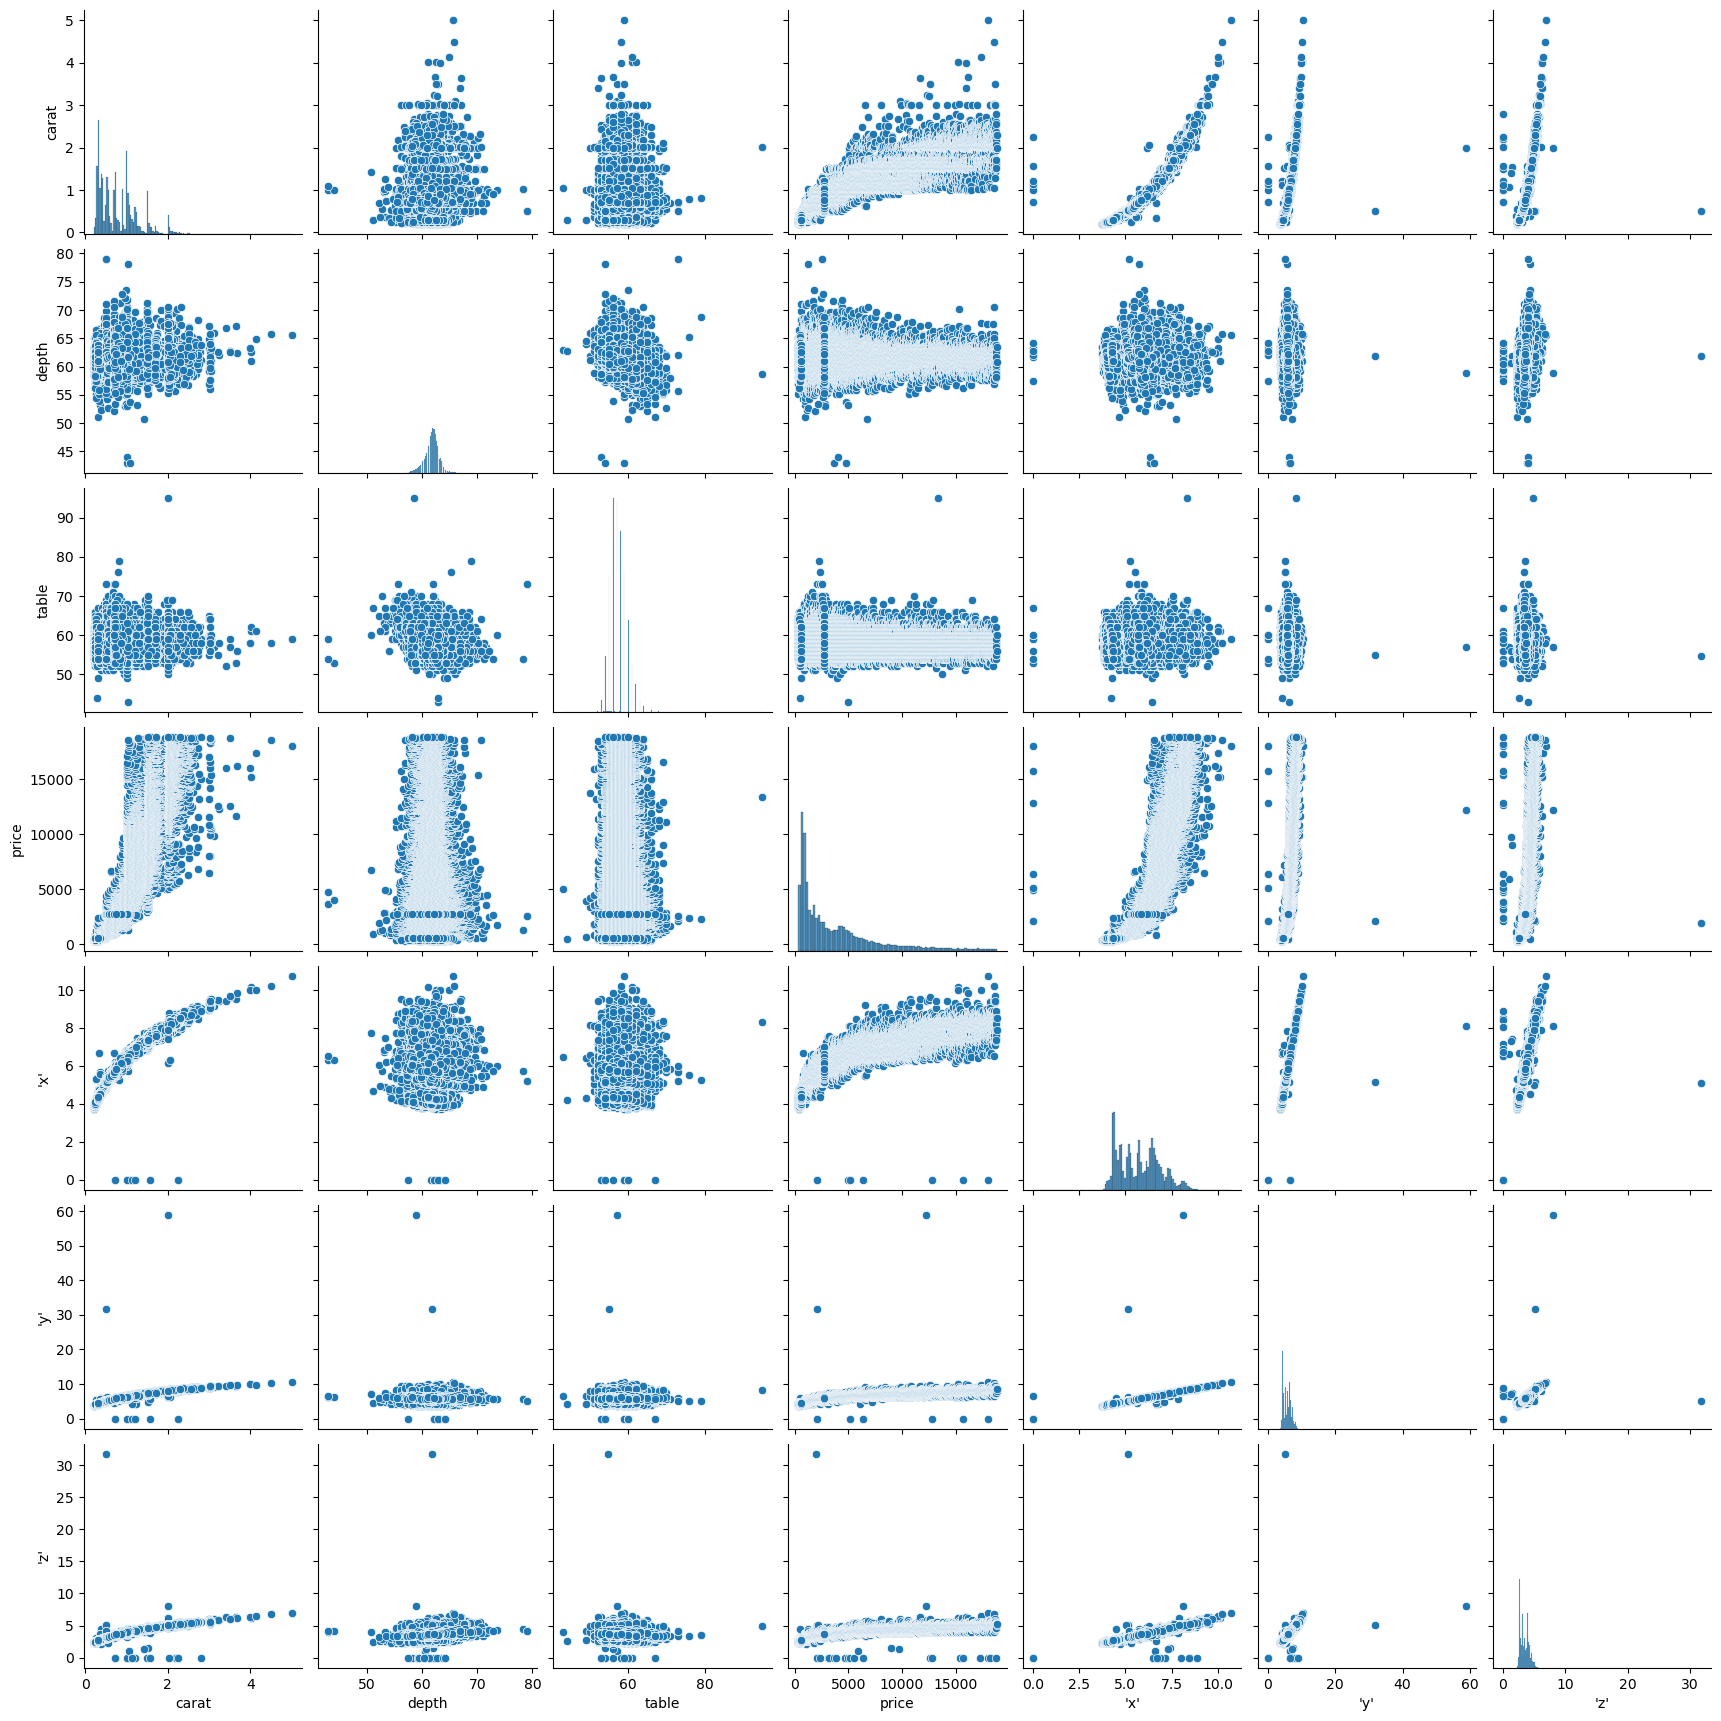

In [11]:
# Examine relationship betw 2 variables 
sns.pairplot(diamonds_ori)

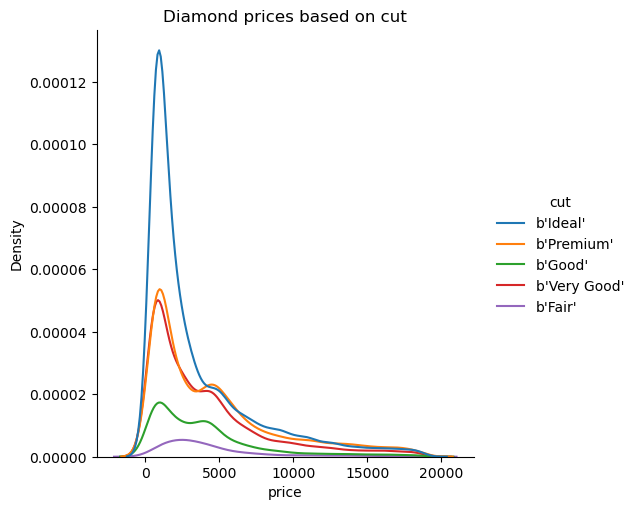

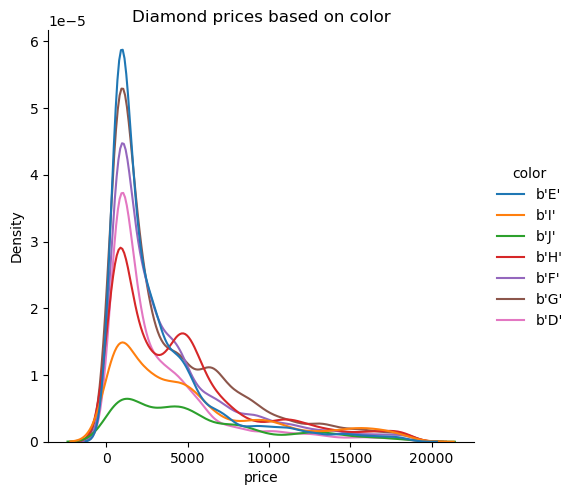

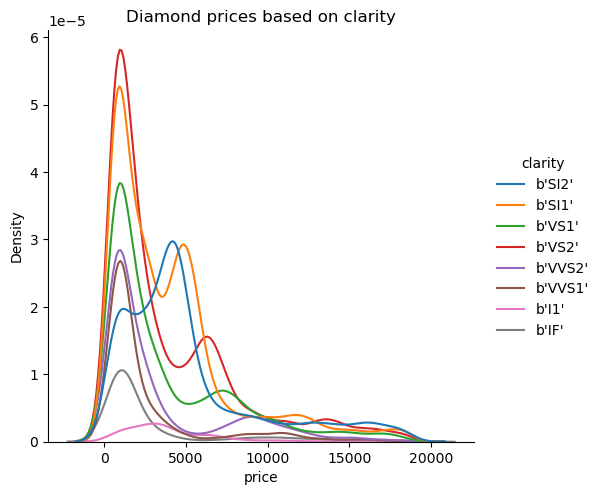

In [12]:
for c in ['cut', 'color', 'clarity']:
    sns.displot(data=diamonds_ori, x="price", hue=f"{c}", kind='kde')
    plt.title(f'Diamond prices based on {c.title().lower()}')
    plt.show()

### Identify the correlation between all the variables

<AxesSubplot:>

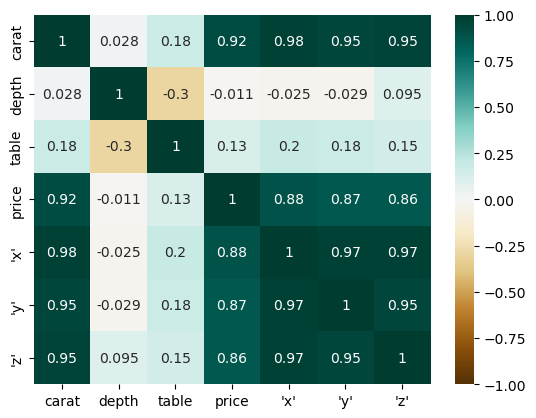

In [13]:
sns.heatmap(diamonds_ori.corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)

# Weak correlation: 
# 1. table vs price, 
# 2. depth vs price

# Strong correlation: 
# 1. carat vs price
# 2. x vs price
# 3. y vs price
# 4. z vs price

### Identify outliers with multiple ways

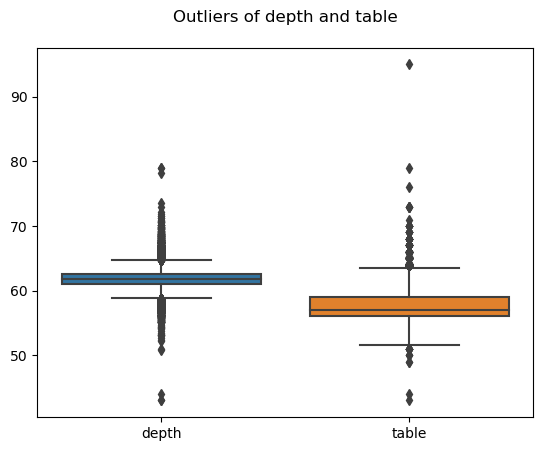

In [14]:
# Identify outliers of "depth" and "table"
sns.boxplot(data= diamonds_ori[["depth","table"]])
plt.title("Outliers of depth and table\n")
plt.show()

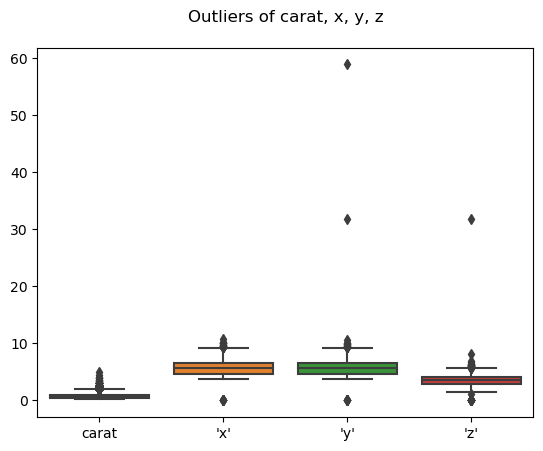

In [15]:
# Identify outliers of "depth" and "table"
sns.boxplot(data= diamonds_ori[["carat","'x'","'y'","'z'"]])
plt.title("Outliers of carat, x, y, z\n")
plt.show()

### Identify missing value with multiple ways

In [16]:
# Identify missing values by isnull
print("Missing values:")
print(diamonds_ori.isnull().sum())

# Result = no missing values 

Missing values:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
'x'        0
'y'        0
'z'        0
dtype: int64


<AxesSubplot:>

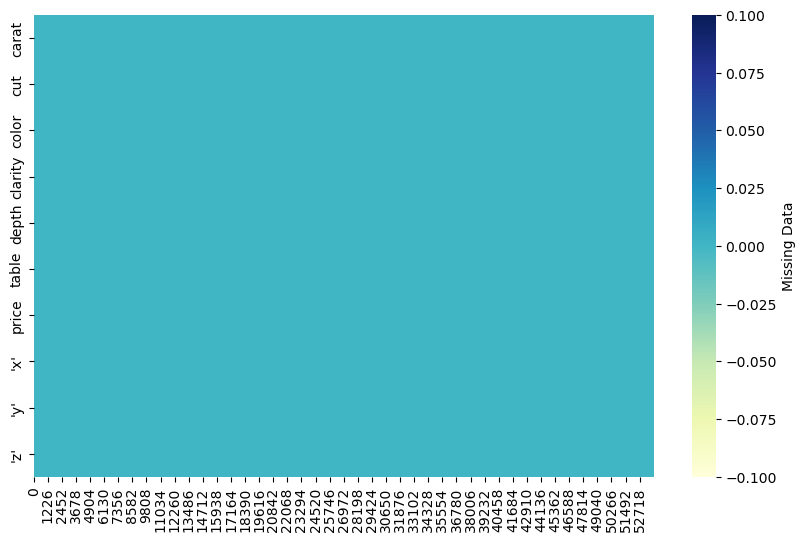

In [17]:
# Identify missing values
plt.figure(figsize=(10,6))                      # size = 10 inches (Wide), wide = 6 inches (High)
sns.heatmap(diamonds_ori.isna().transpose(),    # This transposes the boolean mask so that the rows become columns and vice versa.
            cmap="YlGnBu",                      # Sets the color map to be used for the heatmap
            cbar_kws={'label': 'Missing Data'}) # This adds a colorbar to the heatmap with a label of "Missing Data".

# Result = no missing values 
# No missing values as the whole graph colour belongs to 0.00

### Read the data type

In [18]:
diamonds_ori.dtypes
# Dependent variable = price 
# Categorical type   = cut   , colour, clarity
# No missing values

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
'x'        float64
'y'        float64
'z'        float64
dtype: object

In [19]:
# Get the data type that is categorical variables
s = (diamonds_ori.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


# 3.0 Data Preparation / Pre-processing

### Define Function

In [20]:
# Define Function to identify Outliers using IQR
def replace_outliers(data, variable):
    q75, q25 = np.percentile(data.loc[:, variable], [75, 25])
    iqr = q75 - q25
    
    max_val = q75 + (1.5 * iqr)
    min_val = q25 - (1.5 * iqr)
    
    data.loc[data[variable] < min_val, variable] = np.nan
    data.loc[data[variable] > max_val, variable] = np.nan

In [21]:
# Define Function to replace outliers with column mean
def replace_outliers_with_mean(df, columns):
    for col in columns:
        df.loc[df[col].isnull(), col] = df.loc[:, col].mean()
    return df

### Original Dataset

In [22]:
# Rename "'x'" to "a" to avoid confusion
diamonds_ori.rename (columns = {"'x'" : "a"}, inplace = True)
diamonds_ori.rename (columns = {"'z'" : "z"}, inplace = True)
diamonds_ori.rename (columns = {"'y'" : "y"}, inplace = True)

In [23]:
# Combined Dimension by multiplying x, y, z values
# Combined Dimenesion = Volume

# 'x' = Length
# 'y' = Width
# 'z' = Height
diamonds_ori['dimensions'] = diamonds_ori['a'] * diamonds_ori['y'] * diamonds_ori['z']

In [24]:
diamonds_ori.head()

,carat,cut,color,clarity,depth,table,price,a,y,z,dimensions
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75,51.917250


In [25]:
diamonds_ori.sum()

carat                                                  43040.87
cut           b'Ideal'b'Premium'b'Good'b'Premium'b'Good'b'Ve...
color         b'E'b'E'b'E'b'I'b'J'b'J'b'I'b'H'b'E'b'H'b'J'b'...
clarity       b'SI2'b'SI1'b'VS1'b'VS2'b'SI2'b'VVS2'b'VVS1'b'...
depth                                                 3330762.9
table                                                 3099240.5
price                                               212135217.0
a                                                     309138.62
y                                                     309320.33
z                                                      190879.3
dimensions                                       7004076.815983
dtype: object

In [26]:
#diamonds_ori = diamonds_ori[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'dimensions', 'price']]
diamonds_ori = diamonds_ori.drop(['a', 'y', 'z'], axis=1)

In [27]:
diamonds_ori.head()

,carat,cut,color,clarity,depth,table,price,dimensions
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,38.202030
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,34.505856
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,38.076885
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,46.724580
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,51.917250


### [1] diamonds_A
##### 1. Drop "Depth"
##### 2. Drop "Table"
##### 3. Replace 'dimensions' to mean

In [28]:
# load data 
diamonds_A = pd.read_csv("diamonds.csv")

In [29]:
# Rename "'x'" to "a" to avoid confusing
diamonds_A.rename (columns = {"'x'" : "a"}, inplace = True)
diamonds_A.rename (columns = {"'z'" : "z"}, inplace = True)
diamonds_A.rename (columns = {"'y'" : "y"}, inplace = True)

In [30]:
# Dropping "0" / dimentionless diamonds 
diamonds_A = diamonds_A.drop(diamonds_A[diamonds_A["a"]==0].index)
diamonds_A = diamonds_A.drop(diamonds_A[diamonds_A["y"]==0].index)
diamonds_A = diamonds_A.drop(diamonds_A[diamonds_A["z"]==0].index)

print("Original Shape (Row x Column)                    : ", diamonds_ori.shape) 
print("After Dropping Dimentionless Shape (Row x Column): ", diamonds_A.shape)

Original Shape (Row x Column)                    :  (53940, 8)
After Dropping Dimentionless Shape (Row x Column):  (53920, 10)


In [31]:
# Combined Dimension by multiplying x, y, z values
# Combined Dimenesion = Volume

# 'x' = Length
# 'y' = Width
# 'z' = Height
diamonds_A['dimensions'] = diamonds_A['a'] * diamonds_A['y'] * diamonds_A['z']

In [32]:
diamonds_A.head()

,carat,cut,color,clarity,depth,table,price,a,y,z,dimensions
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75,51.917250


In [33]:
# Remove the 'x', 'y', 'z' column
#diamonds_A = diamonds_A[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'dimensions', 'price']]
diamonds_A = diamonds_A.drop(['a', 'y', 'z'], axis=1)

In [34]:
diamonds_A.head()

,carat,cut,color,clarity,depth,table,price,dimensions
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,38.202030
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,34.505856
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,38.076885
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,46.724580
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,51.917250


In [35]:
# Find column with categorical data
s = (diamonds_A.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [36]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    diamonds_A[col] = label_encoder.fit_transform(diamonds_A[col])

diamonds_A.head()

,carat,cut,color,clarity,depth,table,price,dimensions
0,0.23,2,1,3,61.5,55.0,326.0,38.202030
1,0.21,3,1,2,59.8,61.0,326.0,34.505856
2,0.23,1,1,4,56.9,65.0,327.0,38.076885
3,0.29,3,5,5,62.4,58.0,334.0,46.724580
4,0.31,1,6,3,63.3,58.0,335.0,51.917250


### Identifying Outliers and replace as NAN

In [37]:
# call replace outliers function
replace_outliers(diamonds_A, 'depth')
replace_outliers(diamonds_A, 'table')
replace_outliers(diamonds_A, 'dimensions')

In [38]:
diamonds_A.isnull().sum()

# Example Data
# Number of Outliers:
# depth      = 2,543
# table      =   604
# dimensions = 1,323

carat            0
cut              0
color            0
clarity          0
depth         2543
table          604
price            0
dimensions    1323
dtype: int64

In [39]:
# Call function and replace outliers of 'dimensions' with mean
outliers_dimensions = ['dimensions']

diamonds_A = replace_outliers_with_mean(diamonds_A, outliers_dimensions)

In [40]:
diamonds_A.isnull().sum()

# Number of Outliers:
# depth = 2543
# table = 604

carat            0
cut              0
color            0
clarity          0
depth         2543
table          604
price            0
dimensions       0
dtype: int64

In [41]:
# Remove depth and table outliers when there is any row with missing values (NaN values)
diamonds_A = diamonds_A.dropna(axis = 0)

In [42]:
diamonds_A.isnull().sum()

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
dimensions    0
dtype: int64

In [43]:
diamonds_A.shape

(50991, 8)

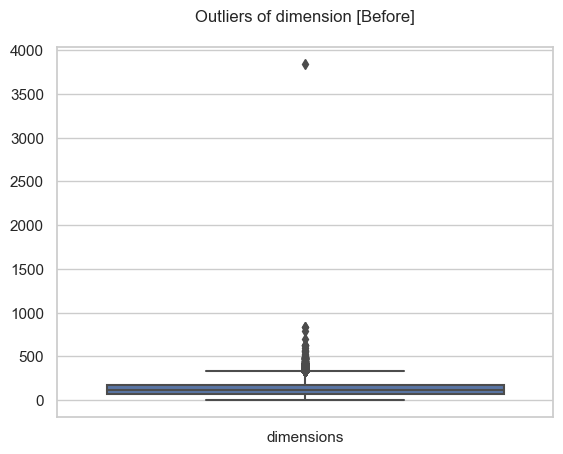

In [44]:
# Boxplot [before] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_ori[['dimensions']])
plt.title("Outliers of dimension [Before]\n")
plt.show()

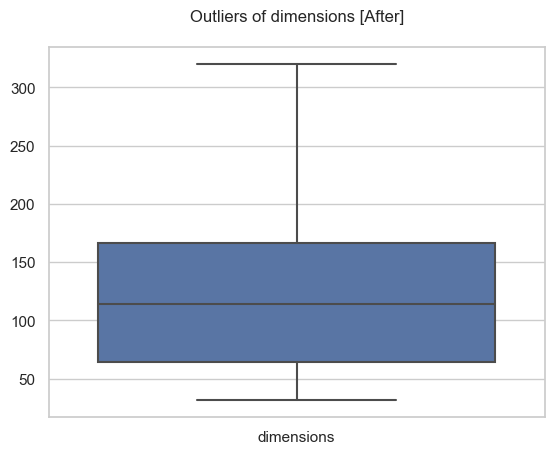

In [45]:
# Boxplot [after] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_A[['dimensions']], showfliers=False)
plt.title("Outliers of dimensions [After]\n")
plt.show()

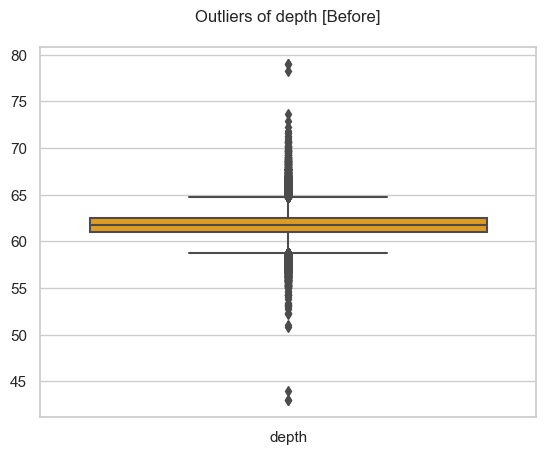

In [46]:
# Boxplot [before] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_ori[['depth']], color='orange')
plt.title("Outliers of depth [Before]\n")
plt.show()

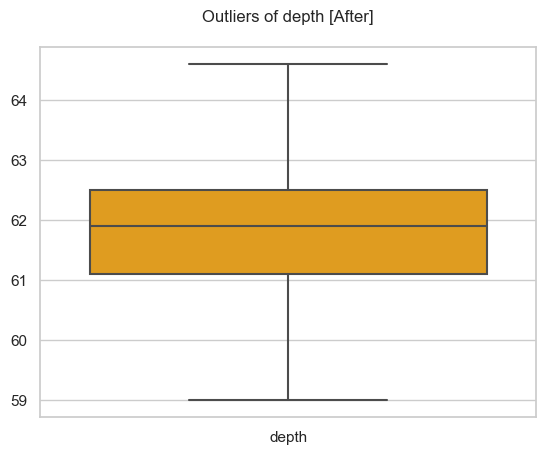

In [47]:
# Boxplot [after] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_A[['depth']], showfliers=False, color='orange')
plt.title("Outliers of depth [After]\n")
plt.show()

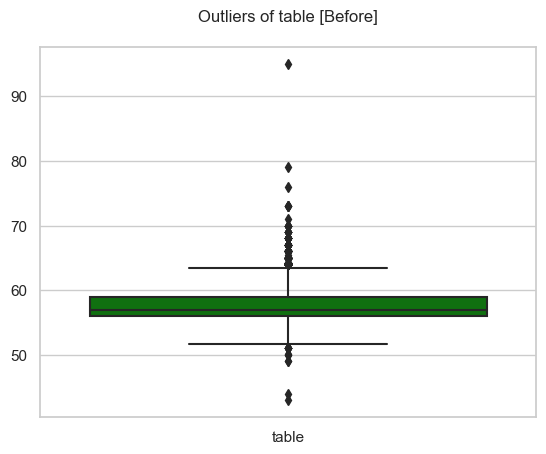

In [48]:
# Boxplot [before] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_ori[['table']], color='green')
plt.title("Outliers of table [Before]\n")
plt.show()

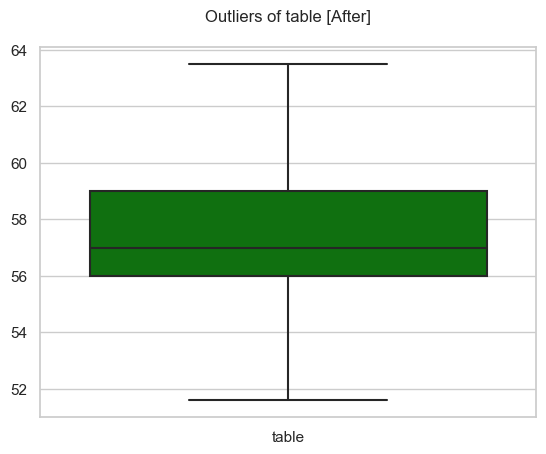

In [49]:
# Boxplot [after] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_A[['table']], showfliers=True, color='green')
plt.title("Outliers of table [After]\n")
plt.show()

## [2] diamonds_B

#### 1. Drop "Depth"
#### 2. Drop "Table"
#### 3. Drop 'a' 
#### 4. Drop 'y'
#### 5. Drop 'z' 

##### Drop all

In [50]:
# load data 
diamonds_B = pd.read_csv("diamonds.csv")

In [51]:
# Rename "'x'" to "a" to avoid confusing
diamonds_B.rename (columns = {"'x'" : "a"}, inplace = True)
diamonds_B.rename (columns = {"'z'" : "z"}, inplace = True)
diamonds_B.rename (columns = {"'y'" : "y"}, inplace = True)

In [52]:
# Dropping "0" / dimentionless diamonds 
diamonds_B = diamonds_B.drop(diamonds_B[diamonds_B["a"]==0].index)
diamonds_B = diamonds_B.drop(diamonds_B[diamonds_B["y"]==0].index)
diamonds_B = diamonds_B.drop(diamonds_B[diamonds_B["z"]==0].index)
diamonds_B.shape

print("Original Shape (Row x Column)                    : ", diamonds_ori.shape) 
print("After Dropping dimentionless Shape (Row x Column): ", diamonds_B.shape)

Original Shape (Row x Column)                    :  (53940, 8)
After Dropping dimentionless Shape (Row x Column):  (53920, 10)


In [53]:
# Combined Dimension by multiplying x, y, z values
# Combined Dimenesion = Volume

# 'x' = Length
# 'y' = Width
# 'z' = Height
diamonds_B['dimensions'] = diamonds_B['a'] * diamonds_B['y'] * diamonds_B['z']

In [54]:
diamonds_B.head()

,carat,cut,color,clarity,depth,table,price,a,y,z,dimensions
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75,51.917250


In [55]:
diamonds_B = diamonds_B.drop(['a', 'y', 'z'], axis=1)

In [56]:
diamonds_B.head()

,carat,cut,color,clarity,depth,table,price,dimensions
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,38.202030
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,34.505856
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,38.076885
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,46.724580
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,51.917250


In [57]:
# Find column with categorical data
s = (diamonds_B.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [58]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    diamonds_B[col] = label_encoder.fit_transform(diamonds_B[col])
diamonds_B.head()

,carat,cut,color,clarity,depth,table,price,dimensions
0,0.23,2,1,3,61.5,55.0,326.0,38.202030
1,0.21,3,1,2,59.8,61.0,326.0,34.505856
2,0.23,1,1,4,56.9,65.0,327.0,38.076885
3,0.29,3,5,5,62.4,58.0,334.0,46.724580
4,0.31,1,6,3,63.3,58.0,335.0,51.917250


### Identifying Outliers and replace as NAN

In [59]:
replace_outliers(diamonds_B, 'depth')
replace_outliers(diamonds_B, 'table')
replace_outliers(diamonds_B, 'dimensions')  

In [60]:
diamonds_B.isnull().sum()

carat            0
cut              0
color            0
clarity          0
depth         2543
table          604
price            0
dimensions    1323
dtype: int64

In [61]:
# Remove all the outliers when there is any row with missing values (NaN values)
diamonds_B = diamonds_B.dropna(axis = 0)

In [62]:
diamonds_B.isnull().sum()

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
dimensions    0
dtype: int64

In [63]:
diamonds_B.shape

(49799, 8)

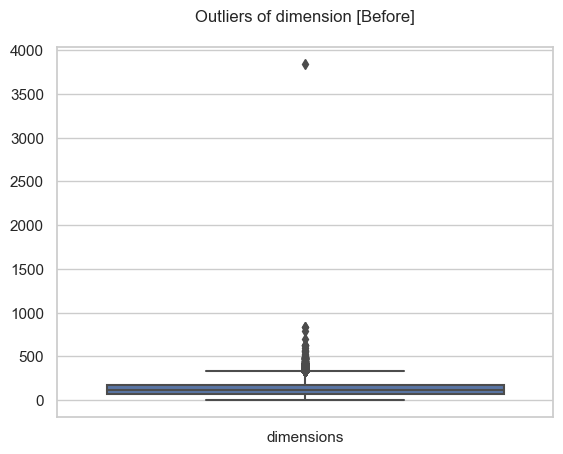

In [64]:
# Boxplot [before] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_ori[['dimensions']], showfliers=True)
plt.title("Outliers of dimension [Before]\n")
plt.show()

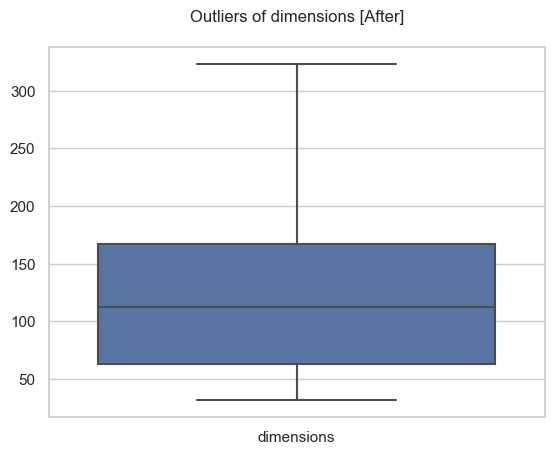

In [65]:
# Boxplot [after] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_B[['dimensions']], showfliers=False)
plt.title("Outliers of dimensions [After]\n")
plt.show()

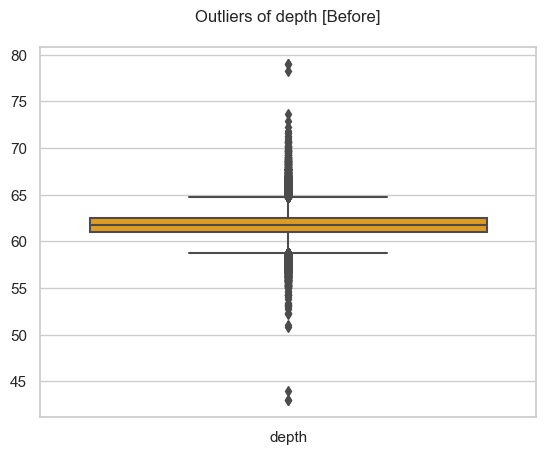

In [66]:
# Boxplot [before] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_ori[['depth']], color='orange')
plt.title("Outliers of depth [Before]\n")
plt.show()

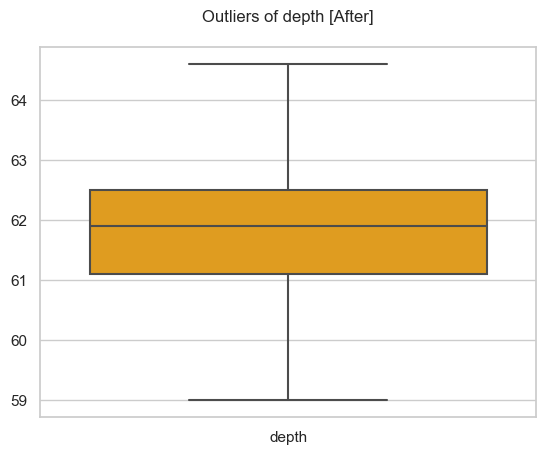

In [67]:
# Boxplot [after] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_B[['depth']], showfliers=False, color='orange')
plt.title("Outliers of depth [After]\n")
plt.show()

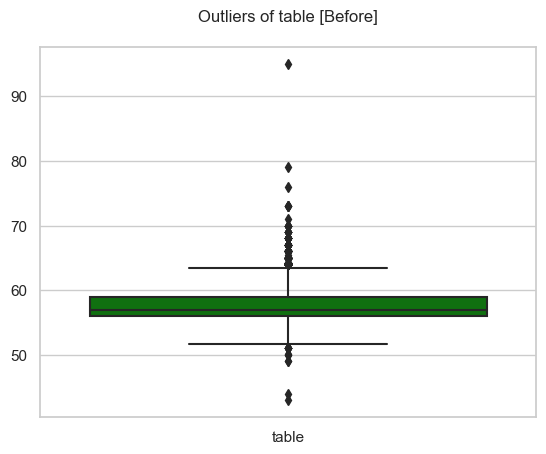

In [68]:
# Boxplot [before] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_ori[['table']], color='green')
plt.title("Outliers of table [Before]\n")
plt.show()

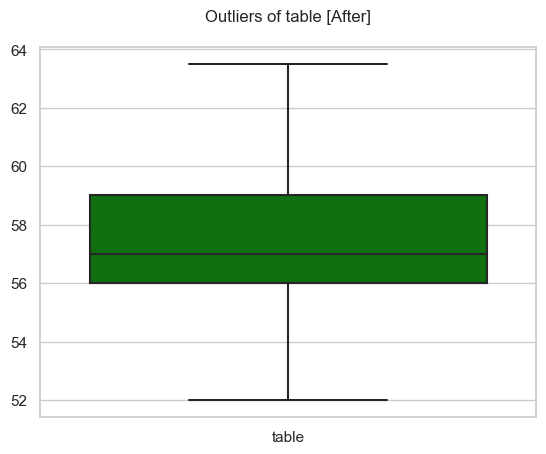

In [69]:
# Boxplot [after] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_B[['table']], showfliers=True, color='green')
plt.title("Outliers of table [After]\n")
plt.show()

## [3] diamonds_C

#### 1. Replace "Depth" to mean
#### 2. Replace "Table" to mean
#### 3. Replace 'Dimensions' to mean

##### Replace all to mean

In [70]:
# load data 
diamonds_C = pd.read_csv("diamonds.csv")

In [71]:
# Rename "'x'" to "a" to avoid confusing
diamonds_C.rename (columns = {"'x'" : "a"}, inplace = True)
diamonds_C.rename (columns = {"'z'" : "z"}, inplace = True)
diamonds_C.rename (columns = {"'y'" : "y"}, inplace = True)

In [72]:
## Dropping "0" / dimentionless diamonds 
diamonds_C = diamonds_C.drop(diamonds_C[diamonds_C["a"]==0].index)
diamonds_C = diamonds_C.drop(diamonds_C[diamonds_C["y"]==0].index)
diamonds_C = diamonds_C.drop(diamonds_C[diamonds_C["z"]==0].index)
diamonds_C.shape

print("Original Shape (Row x Column)                    : ", diamonds_ori.shape) 
print("After Dropping dimentionless Shape (Row x Column): ", diamonds_C.shape)

Original Shape (Row x Column)                    :  (53940, 8)
After Dropping dimentionless Shape (Row x Column):  (53920, 10)


In [73]:
# Combined Dimension by multiplying x, y, z values
# Combined Dimenesion = Volume

# 'x' = Length
# 'y' = Width
# 'z' = Height
diamonds_C['dimensions'] = diamonds_C['a'] * diamonds_C['y'] * diamonds_C['z']

In [74]:
diamonds_C.head()

,carat,cut,color,clarity,depth,table,price,a,y,z,dimensions
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75,51.917250


In [75]:
diamonds_C = diamonds_C.drop(['a', 'y', 'z'], axis=1)

In [76]:
diamonds_C.head()

,carat,cut,color,clarity,depth,table,price,dimensions
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,38.202030
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,34.505856
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,38.076885
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,46.724580
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,51.917250


In [77]:
# Find column with categorical data
s = (diamonds_C.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [78]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    diamonds_C[col] = label_encoder.fit_transform(diamonds_C[col])
diamonds_C.head()

,carat,cut,color,clarity,depth,table,price,dimensions
0,0.23,2,1,3,61.5,55.0,326.0,38.202030
1,0.21,3,1,2,59.8,61.0,326.0,34.505856
2,0.23,1,1,4,56.9,65.0,327.0,38.076885
3,0.29,3,5,5,62.4,58.0,334.0,46.724580
4,0.31,1,6,3,63.3,58.0,335.0,51.917250


### Identifying Outliers and replace as NAN

In [79]:
replace_outliers(diamonds_C, 'depth')
replace_outliers(diamonds_C, 'table')
replace_outliers(diamonds_C, 'dimensions')

In [80]:
diamonds_C.isnull().sum()

carat            0
cut              0
color            0
clarity          0
depth         2543
table          604
price            0
dimensions    1323
dtype: int64

In [81]:
# Call function and replace outliers of depth, table, dimensions with mean
outliers_depth = ['depth']
outliers_table = ['table']
outliers_dimensions = ['dimensions']


diamonds_C = replace_outliers_with_mean(diamonds_C, outliers_depth + outliers_table + outliers_dimensions)

In [82]:
diamonds_C.isnull().sum()

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
dimensions    0
dtype: int64

In [83]:
diamonds_C.shape

(53920, 8)

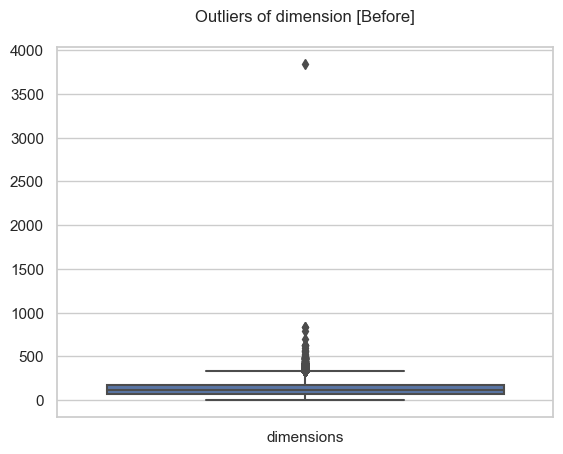

In [84]:
# Boxplot [before] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_ori[['dimensions']])
plt.title("Outliers of dimension [Before]\n")
plt.show()

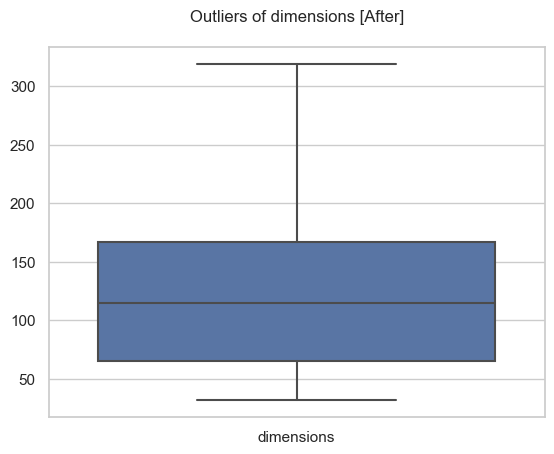

In [85]:
# Boxplot [after] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_C[['dimensions']], showfliers=False)
plt.title("Outliers of dimensions [After]\n")
plt.show()

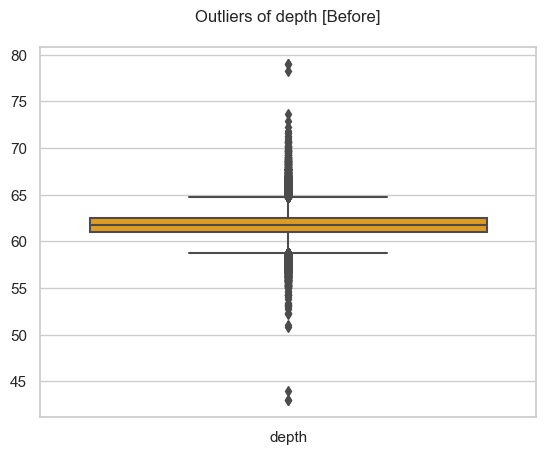

In [86]:
# Boxplot [before] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_ori[['depth']], color='orange')
plt.title("Outliers of depth [Before]\n")
plt.show()

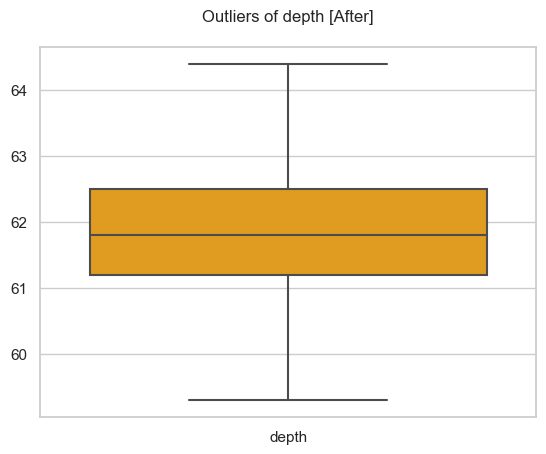

In [87]:
# Boxplot [after] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_C[['depth']], showfliers=False, color='orange')
plt.title("Outliers of depth [After]\n")
plt.show()

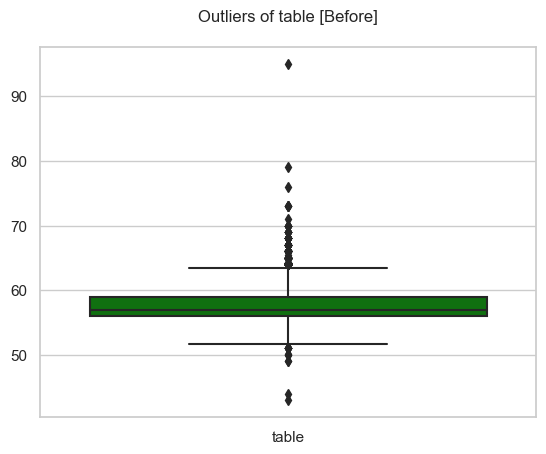

In [88]:
# Boxplot [before] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_ori[['table']], color='green')
plt.title("Outliers of table [Before]\n")
plt.show()

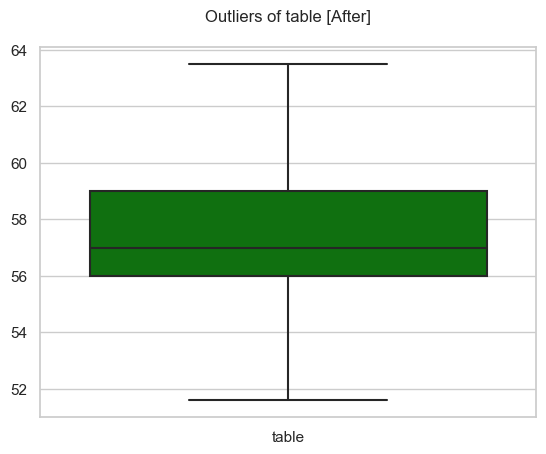

In [89]:
# Boxplot [after] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_C[['table']], showfliers=True, color='green')
plt.title("Outliers of table [After]\n")
plt.show()

## [4] diamonds_D

#### 1. Replace "Depth" to mean
#### 2. Replace "Table" to mean
#### 3. Drop 'Dimensions'

In [90]:
#load data 
diamonds_D = pd.read_csv("diamonds.csv")

In [91]:
# Rename "'x'" to "a" to avoid confusing
diamonds_D.rename (columns = {"'x'" : "a"}, inplace = True)
diamonds_D.rename (columns = {"'z'" : "z"}, inplace = True)
diamonds_D.rename (columns = {"'y'" : "y"}, inplace = True)

In [92]:
## Dropping "0" / dimentionless diamonds 
diamonds_D = diamonds_D.drop(diamonds_D[diamonds_D["a"]==0].index)
diamonds_D = diamonds_D.drop(diamonds_D[diamonds_D["y"]==0].index)
diamonds_D = diamonds_D.drop(diamonds_D[diamonds_D["z"]==0].index)
diamonds_D.shape

print("Original Shape (Row x Column)                    : ", diamonds_ori.shape) 
print("After Dropping dimentionless Shape (Row x Column): ", diamonds_D.shape)

Original Shape (Row x Column)                    :  (53940, 8)
After Dropping dimentionless Shape (Row x Column):  (53920, 10)


In [93]:
# Combined Dimension by multiplying x, y, z values
# Combined Dimenesion = Volume

# 'x' = Length
# 'y' = Width
# 'z' = Height
diamonds_D['dimensions'] = diamonds_D['a'] * diamonds_D['y'] * diamonds_D['z']

In [94]:
diamonds_D.head()

,carat,cut,color,clarity,depth,table,price,a,y,z,dimensions
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75,51.917250


In [95]:
diamonds_D = diamonds_D.drop(['a', 'y', 'z'], axis=1)

In [96]:
diamonds_D.head()

,carat,cut,color,clarity,depth,table,price,dimensions
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,38.202030
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,34.505856
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,38.076885
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,46.724580
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,51.917250


In [97]:
# Find column with categorical data
s = (diamonds_D.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [98]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    diamonds_D[col] = label_encoder.fit_transform(diamonds_D[col])
diamonds_D.head()

,carat,cut,color,clarity,depth,table,price,dimensions
0,0.23,2,1,3,61.5,55.0,326.0,38.202030
1,0.21,3,1,2,59.8,61.0,326.0,34.505856
2,0.23,1,1,4,56.9,65.0,327.0,38.076885
3,0.29,3,5,5,62.4,58.0,334.0,46.724580
4,0.31,1,6,3,63.3,58.0,335.0,51.917250


### Identifying Outliers and replace as NAN

In [99]:
replace_outliers(diamonds_D, 'depth')
replace_outliers(diamonds_D, 'table')
replace_outliers(diamonds_D, 'dimensions')

In [100]:
diamonds_D.isnull().sum()

carat            0
cut              0
color            0
clarity          0
depth         2543
table          604
price            0
dimensions    1323
dtype: int64

In [101]:
# Call function and replace outliers of depth, table with mean
outliers_depth = ['depth']
outliers_table = ['table']

diamonds_D = replace_outliers_with_mean(diamonds_D, outliers_depth + outliers_table)

In [102]:
#Dropping outliers in XYZ
diamonds_D = diamonds_D.dropna(axis = 0)

In [103]:
diamonds_D.shape

(52597, 8)

In [104]:
diamonds_D.isnull().sum()

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
dimensions    0
dtype: int64

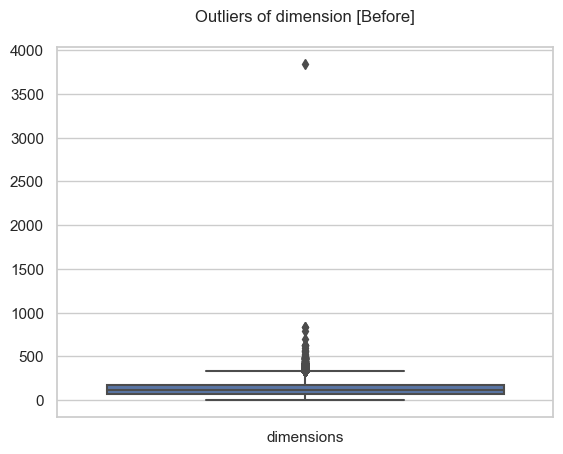

In [105]:
# Boxplot [before] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_ori[['dimensions']], showfliers=True)
plt.title("Outliers of dimension [Before]\n")
plt.show()

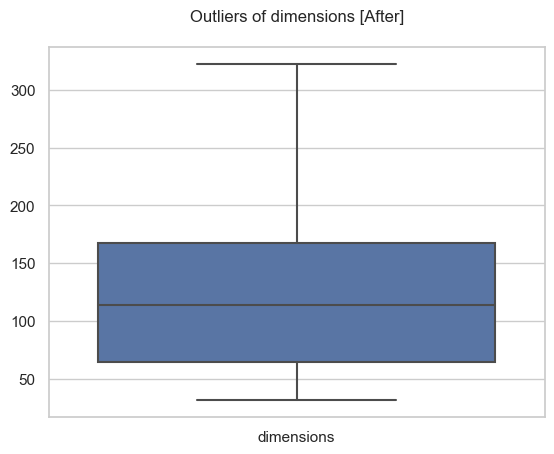

In [106]:
# Boxplot [after] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_D[['dimensions']], showfliers=False)
plt.title("Outliers of dimensions [After]\n")
plt.show()

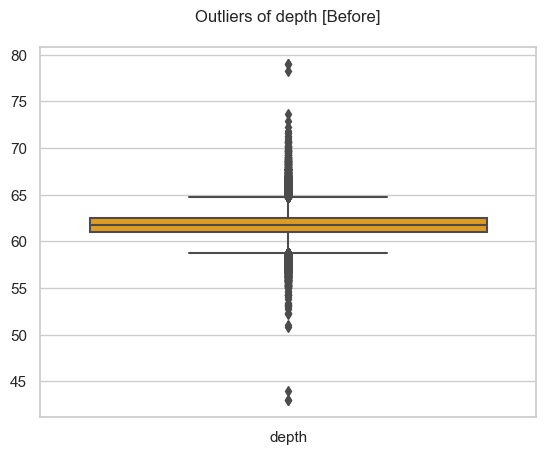

In [107]:
# Boxplot [before] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_ori[['depth']], color='orange')
plt.title("Outliers of depth [Before]\n")
plt.show()

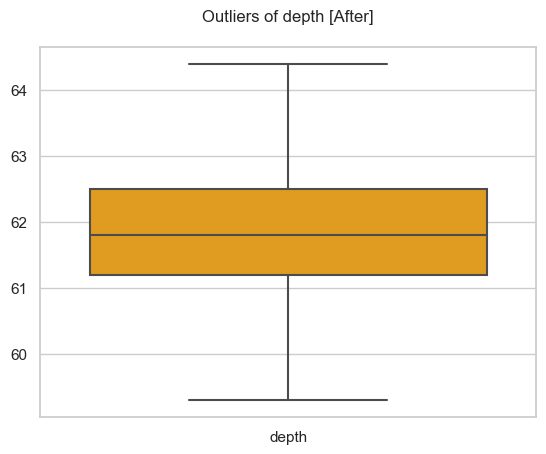

In [108]:
# Boxplot [after] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_D[['depth']], showfliers=False, color='orange')
plt.title("Outliers of depth [After]\n")
plt.show()

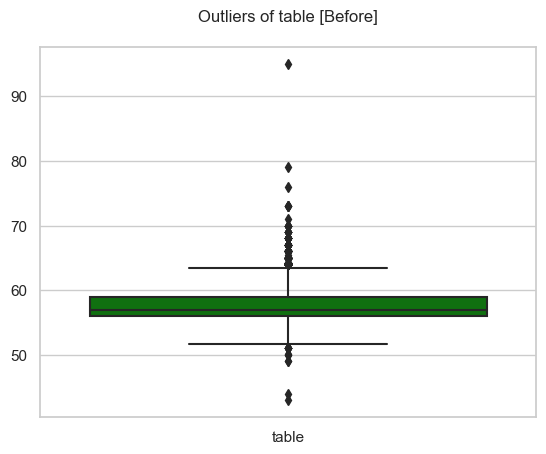

In [109]:
# Boxplot [before] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_ori[['table']], color='green')
plt.title("Outliers of table [Before]\n")
plt.show()

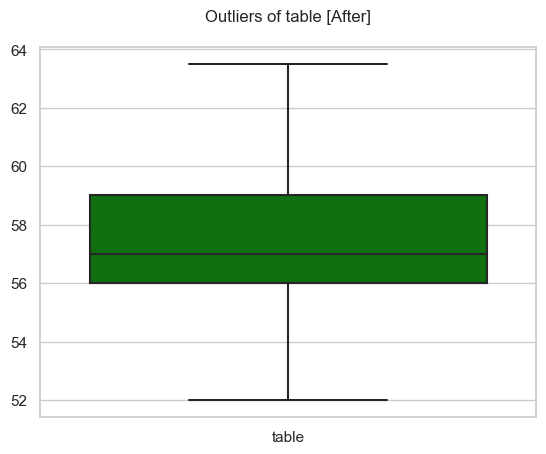

In [110]:
# Boxplot [after] remove outliers
sns.set(style="whitegrid")
sns.boxplot(data = diamonds_D[['table']], showfliers=True, color='green')
plt.title("Outliers of table [After]\n")
plt.show()

# 4.0 Machine Learning Models [4 types]

### 1. Logistic Regression
### 2. Decision Tree
### 3. Random Forest
### 4. Gradient Boosting

# -----------------------------------

# MODEL Results 

## DATASET A

## 1 Decision Tree
### R^2 :  0.9702512316386471
### MAE : 337.42487825603826
### MSE : 461733.48527633434
### RMSE: 679.5097389120588
# -----------------------------------

## 2 Random Forest (Best Result in DataSet A)
### R^2 :  0.9817339571068887
##### MAE : 269.8468176881639
### MSE : 283509.0026180747
### RMSE: 532.455634412929
# -----------------------------------

## 3 Gradient Boosting
### R^2 :  0.9581214580252396
### MAE : 444.23823587627703
### MSE : 650000.864217896
### RMSE: 806.2263107948636
# -----------------------------------

## 4 Neural Network
### R^2 :  0.9349737778596574
### MAE : 524.9646115420308
### MSE : 1009278.2268666704
### RMSE: 1004.628402379044


# ------------------------------------------------------------------


## DATASET B

## 1 Decision Tree
### R^2 :  0.9719515998168502
### MAE : 301.26618139223564
### MSE : 355083.73621987953
### RMSE: 595.8890301221189
# -----------------------------------

## 2 Random Forest 
### R^2 :  0.9836271535565192
### MAE : 240.1094324922889
### MSE : 207274.9764600896
### RMSE: 455.27461653389986
# -----------------------------------

## 2 A Random Forest (without custom tuning) (Best Result in DataSet B)
### R^2 :  0.9836580702164914
### MAE : 239.79659553651112
### MSE : 206883.58147632243
### RMSE: 454.8445684806211
# -----------------------------------

## 3 Gradient Boosting
### R^2 :  0.9590916738027943
### MAE : 395.6013543414629
### MSE : 517886.26851280767
### RMSE: 719.6431535926731
# -----------------------------------

## 4 Neural Network
### R^2 :  0.9746310614846896
### MAE : 318.8672185865839
### MSE : 321162.6122391282
### RMSE: 566.7121070165417

# ------------------------------------------------------------------
## DATASET C

## 1 Decision Tree
### R^2 :  0.9693294331979982
### MAE : 350.949709446093
### MSE : 491709.0200193703
### RMSE: 701.2196660243994
# -----------------------------------

## 2 Random Forest 
### R^2 :  0.9823659845237842
### MAE : 276.2505262058506
### MSE : 282707.66969492676
### RMSE: 531.7026139628493
# -----------------------------------

## 2 A Random Forest (without custom tuning) (Best Result in DataSet C)
### R^2 :  0.982803999075019
### MAE : 274.8883404573836
### MSE : 275685.44193068973
### RMSE: 525.0575605880651
# -----------------------------------

## 3 Gradient Boosting
### R^2 :  0.9597128274786486
### MAE : 454.1738805369226
### MSE : 645881.9704151037
### RMSE: 803.6678234289984
# -----------------------------------

## 4 Neural Network
### R^2 :  0.9458955768741352
### v MAE : 505.5279730355726
### MSE : 867399.4532176703
### RMSE: 931.3428226049043
 
# ------------------------------------------------------------------


## DATASET D

## 1 Decision Tree
### R^2 :  0.9695383977428981
### MAE : 315.3517902408111
### MSE : 384761.5740995986
### RMSE: 620.291523478758
# -----------------------------------

## 2 Random Forest (Best Result in DataSet A)
### R^2 :  0.9822943582878317
### MAE : 250.0899022619391
### MSE : 223640.58587985465
### RMSE: 472.9065297496479
# -----------------------------------

## 2 A Random Forest (Best Result in DataSet A)
### R^2 :  0.9821755386884446
### MAE : 250.2430968280373
### MSE : 225141.4004367577
### RMSE: 474.4906747626951
# -----------------------------------

## 3 Gradient Boosting
### R^2 :  0.9558079622501803
### MAE : 413.28626373894946
### MSE : 558191.1898060222
### RMSE: 747.1219377089808
# -----------------------------------

## 4 Neural Network
### R^2 :  0.9750402845722826
### MAE : 319.3989331975858
### MSE : 315267.0472154025
### RMSE: 561.4864621835529


# ------------------------------------------------------------------

## ORISET 

## 1 Decision Tree
### R^2 :  0.9695383977428981
### MAE : 315.3517902408111
### MSE : 384761.5740995986
### RMSE: 620.291523478758
# -----------------------------------

## 2 Random Forest 
### R^2 :  0.979836976632384
### MAE : 277.69874875233495
### MSE : 323252.59995100804
### RMSE: 568.5530757554725
# -----------------------------------

## 2 A Random Forest (Best Result in DataSet ORI)
### R^2 :  0.980376717414763
### MAE : 275.42434969254595
### MSE : 314599.5022472262
### RMSE: 560.8917027798024
# -----------------------------------

## 3 Gradient Boosting
### R^2 :  0.957986523776166
### MAE : 455.0319477067989
### MSE : 673557.9865540746
### RMSE: 820.7057856223962
# -----------------------------------

## 4 Neural Network
### R^2 :  0.9596117494420661
### MAE : 466.6275933560881
### MSE : 647502.4485312841
### RMSE: 804.6753684134268


# DATASET A

In [111]:
X = diamonds_A.drop(['price'],axis=1)
y = diamonds_A['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40792, 7), (10199, 7), (40792,), (10199,))

In [112]:
X_train.head()

,carat,cut,color,clarity,depth,table,dimensions
45742,0.52,1,0,5,63.4,56.0,85.359300
33105,0.32,2,1,7,62.2,53.0,53.166412
9112,0.90,2,2,5,60.5,54.0,143.915250
12064,1.04,3,0,3,59.8,58.0,170.844704
21719,0.32,2,4,7,61.6,55.0,54.136372


In [113]:
def classify(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("MSE :", mean_squared_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    #EVALUATION OF THE MODEL
    #Plotting y_test and y_pred 
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
    plt.xlabel('y_test',fontsize=18)                          # X-label
    plt.ylabel('y_pred',fontsize=16)

# Model 1 - Linear regr

R^2 :  0.8839098480413566
MAE : 908.829666609005
MSE : 1801846.376260737
RMSE: 1342.3287139373638


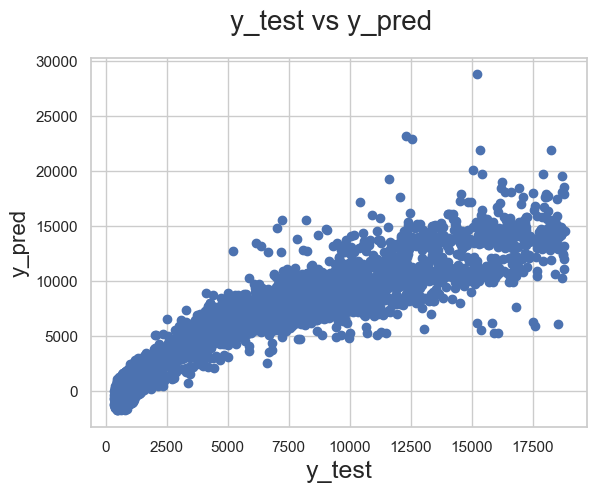

In [114]:
model_1 = LinearRegression()
classify(model_1)

In [115]:
# Scale the training data
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)

# Set up the parameter grid
#param_grid = {'C': [0.1, 1, 10], 'penalty': ['none', 'l2']}

# Create a logistic regression model
#logreg = LogisticRegression()

# Use GridSearchCV to search over the parameter grid
#grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
#grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
#print("Best Parameters: ", grid_search.best_params_)
#print("Best Score: ", grid_search.best_score_)

In [116]:
#from sklearn.linear_model import LogisticRegression
#model_1= LogisticRegression(C=0.1, penalty='l2', solver='lbfgs', max_iter=900)
#classify(model_1)

# Model 2 - Decision Tree Regr

In [117]:
# Define the grid of hyperparameters to search over
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}
dt_regressor = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_dt_regressor = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the data
grid_dt_regressor.fit(X, y)

# Print the best parameters and score
print("Best parameters: ", grid_dt_regressor.best_params_)
print("Best score: ", grid_dt_regressor.best_score_)

Best parameters:  {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4}
Best score:  -0.10659194909668963


R^2 :  0.9702512316386471
MAE : 337.42487825603826
MSE : 461733.48527633434
RMSE: 679.5097389120588


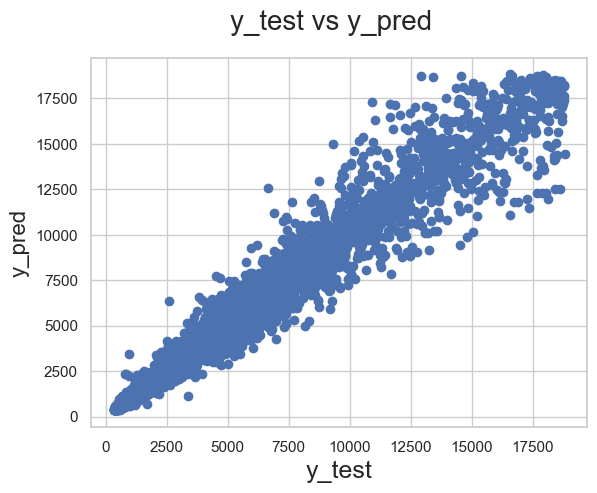

In [117]:
from sklearn.tree import DecisionTreeRegressor
model_2= DecisionTreeRegressor(random_state = 1)

# Call the classify() function
classify(model_2)


# Model 3 - Random Forest regr

In [ ]:
param_grid = { 
   'n_estimators': [500, 1000, 5000],
    'max_features': ['auto', 'sqrt', 'log2'],
    #to save time in updating the notebook, max_depth is also left out
    #'max_depth' : [10, 15, 20],
    'criterion' :['squared_error', 'absolute_error', 'friedman_mse']
}

# Create a Random Forest regressor instance
rf_regressor = RandomForestRegressor(random_state=42)

# Create GridSearchCV instance with the regressor and parameter grid
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Best Score So Far - RFR

R^2 :  0.9817339571068887
MAE : 269.8468176881639
MSE : 283509.0026180747
RMSE: 532.455634412929


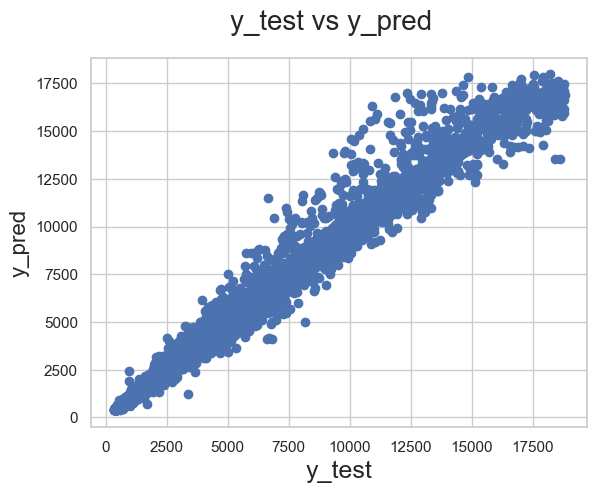

In [118]:
model_3= RandomForestRegressor(n_estimators=1000, max_features='auto', max_depth=15 ,min_samples_leaf=3, random_state=1)
classify(model_3)

#R^2 :  0.9817339571068887
#MAE : 269.8468176881639
#MSE : 283509.0026180747
#RMSE: 532.455634412929

# Model 4 - Gradient Boosting regr

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


# Create a gradient boosting regressor object
gb_regressor = GradientBoostingRegressor(random_state=42)

param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.05, 0.1, 0.2]}


# Define the grid search object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

R^2 :  0.9581214580252396
MAE : 444.23823587627703
MSE : 650000.864217896
RMSE: 806.2263107948636


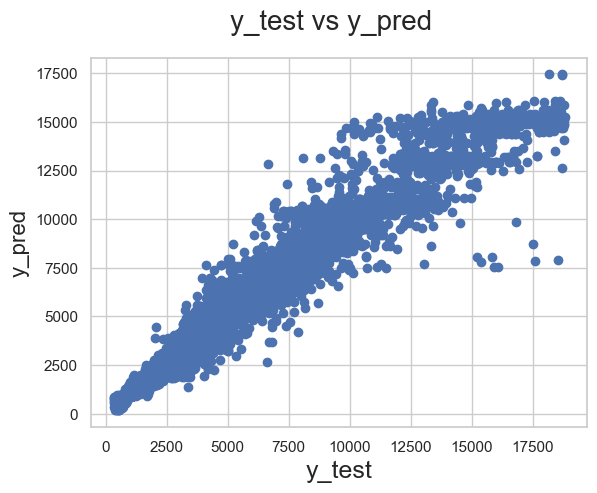

In [120]:
# tune your model according to hyperparameters above
model_4= GradientBoostingRegressor(learning_rate = 0.05, n_estimators=100, max_depth=3)
classify(model_4)

# Model 5 - Neural network

In [ ]:
# Create instance of MLPRegressor
mlp = MLPRegressor(random_state=1)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10,10), (50,50), (100,100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create GridSearchCV instance
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV to data
grid_search.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

R^2 :  0.9349737778596574
MAE : 524.9646115420308
MSE : 1009278.2268666704
RMSE: 1004.628402379044


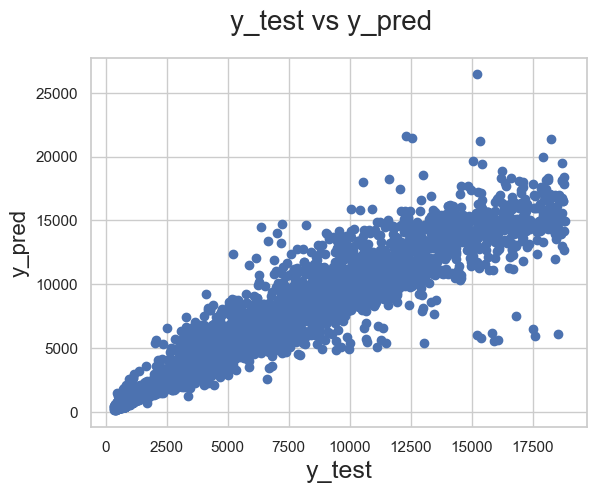

In [121]:
model_5= MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=500, learning_rate = 'constant',random_state=1)
classify(model_5)

# DATASET B

In [125]:
X = diamonds_B.drop(['price'],axis=1)
y = diamonds_B['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39839, 7), (9960, 7), (39839,), (9960,))

# Model 1

R^2 :  0.8711769478159798
MAE : 881.7086727592429
MSE : 1630858.4583098872
RMSE: 1277.050687447404


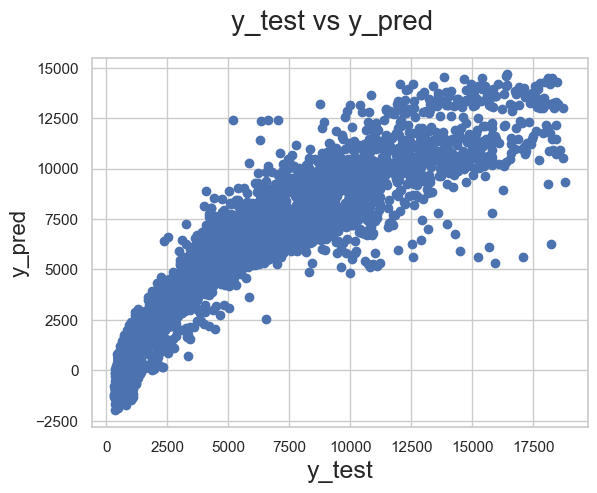

In [194]:
model_1 = LinearRegression()
classify(model_1)

# Model 2

R^2 :  0.9719515998168502
MAE : 301.26618139223564
MSE : 355083.73621987953
RMSE: 595.8890301221189


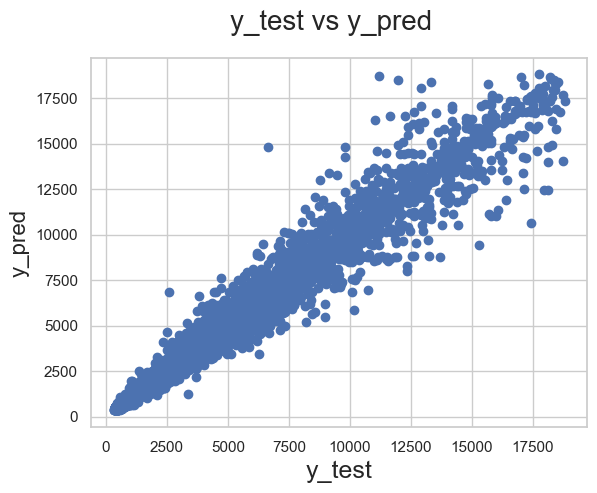

In [126]:
from sklearn.tree import DecisionTreeRegressor
model_2= DecisionTreeRegressor(random_state = 1)

# Call the classify() function
classify(model_2)

## R^2 :  0.9719515998168502
## MAE : 301.26618139223564
## MSE : 355083.73621987953
## RMSE: 595.8890301221189

# Model 3

R^2 :  0.9836271535565192
MAE : 240.1094324922889
MSE : 207274.9764600896
RMSE: 455.27461653389986


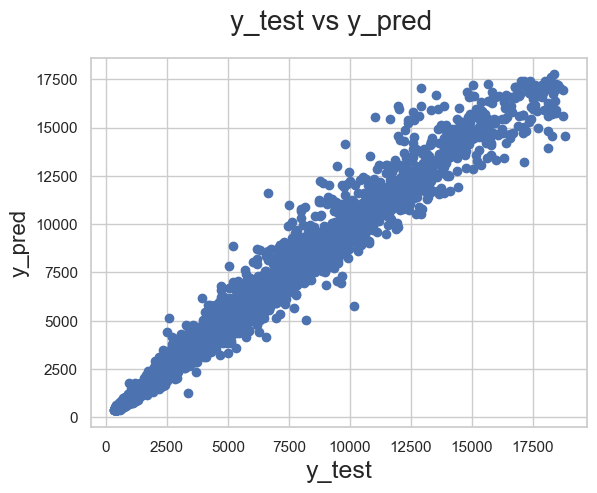

In [127]:
model_3= RandomForestRegressor(n_estimators=1000, max_features='auto', max_depth=15 ,min_samples_leaf=3, random_state=1)
classify(model_3)

## R^2 :  0.9836271535565192
## MAE : 240.1094324922889
## MSE : 207274.9764600896
## RMSE: 455.27461653389986

R^2 :  0.9836580702164914
MAE : 239.79659553651112
MSE : 206883.58147632243
RMSE: 454.8445684806211


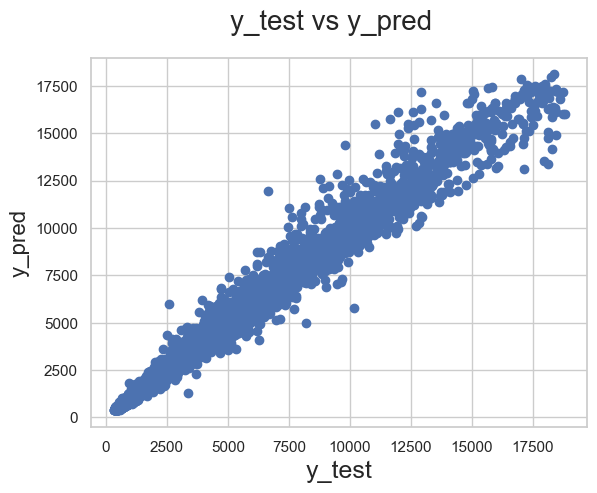

In [129]:
model_3A = RandomForestRegressor()
classify(model_3A)

# Model 4

R^2 :  0.9590916738027943
MAE : 395.6013543414629
MSE : 517886.26851280767
RMSE: 719.6431535926731


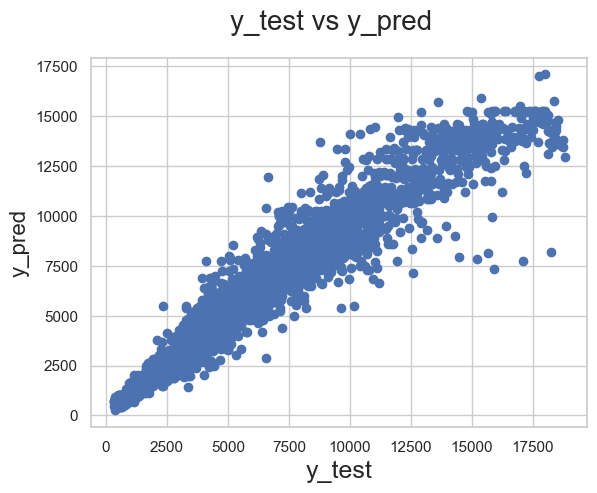

In [130]:
# tune your model according to hyperparameters above
model_4= GradientBoostingRegressor(learning_rate = 0.05, n_estimators=100, max_depth=3)
classify(model_4)

## R^2 :  0.9590916738027943
## MAE : 395.6013543414629
## MSE : 517886.26851280767
## RMSE: 719.6431535926731

# Model 5

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 :  0.9746310614846896
MAE : 318.8672185865839
MSE : 321162.6122391282
RMSE: 566.7121070165417


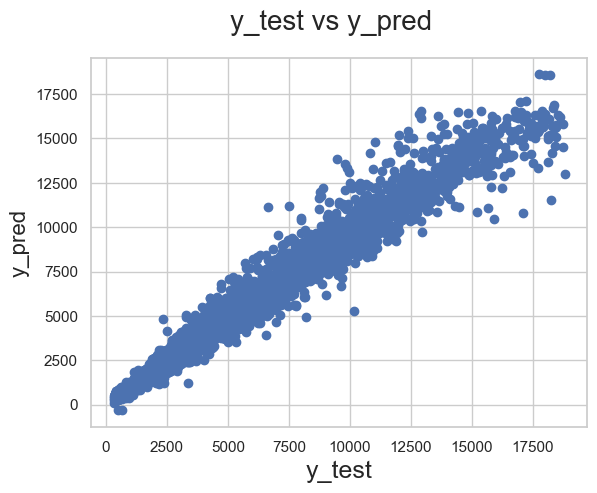

In [131]:
model_5= MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=500, learning_rate = 'constant',random_state=1)
classify(model_5)

## R^2 :  0.9746310614846896
## MAE : 318.8672185865839
## MSE : 321162.6122391282
## RMSE: 566.7121070165417

# DATASET C

In [132]:
X = diamonds_C.drop(['price'],axis=1)
y = diamonds_C['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43136, 7), (10784, 7), (43136,), (10784,))

# Model 1

R^2 :  0.8711769478159798
MAE : 881.7086727592429
MSE : 1630858.4583098872
RMSE: 1277.050687447404


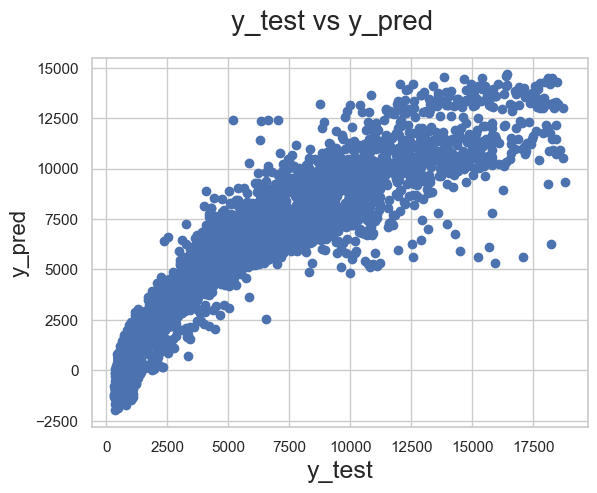

In [194]:
model_1 = LinearRegression()
classify(model_1)

# Model 2

In [117]:
# Define the grid of hyperparameters to search over
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

dt_regressor = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_dt_regressor = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the data
grid_dt_regressor.fit(X, y)

# Print the best parameters and score
print("Best parameters: ", grid_dt_regressor.best_params_)
print("Best score: ", grid_dt_regressor.best_score_)

NameError: name 'dt_regressor' is not defined

R^2 :  0.9693294331979982
MAE : 350.949709446093
MSE : 491709.0200193703
RMSE: 701.2196660243994


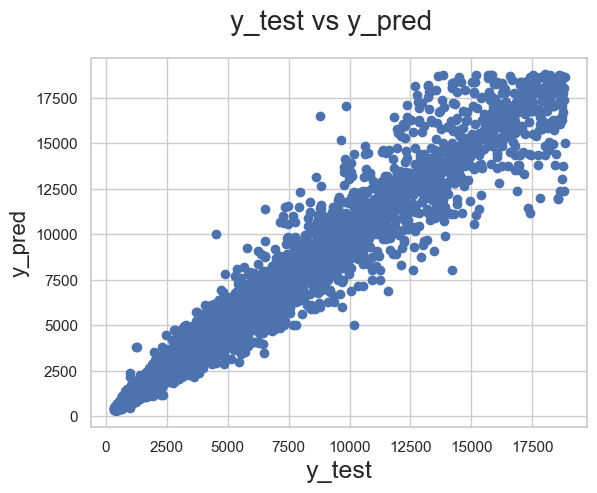

In [133]:
from sklearn.tree import DecisionTreeRegressor
model_2= DecisionTreeRegressor(random_state = 1)

# Call the classify() function
classify(model_2)

## R^2 :  0.9693294331979982
## MAE : 350.949709446093
## MSE : 491709.0200193703
## RMSE: 701.2196660243994


# Model 3

In [ ]:
param_grid = { 
   'n_estimators': [500, 1000, 5000],
    'max_features': ['auto', 'sqrt', 'log2'],
    #to save time in updating the notebook, max_depth is also left out
    #'max_depth' : [10, 15, 20],
    'criterion' :['squared_error', 'absolute_error', 'friedman_mse']
}

# Create a Random Forest regressor instance
rf_regressor = RandomForestRegressor(random_state=42)

# Create GridSearchCV instance with the regressor and parameter grid
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

R^2 :  0.9823659845237842
MAE : 276.2505262058506
MSE : 282707.66969492676
RMSE: 531.7026139628493


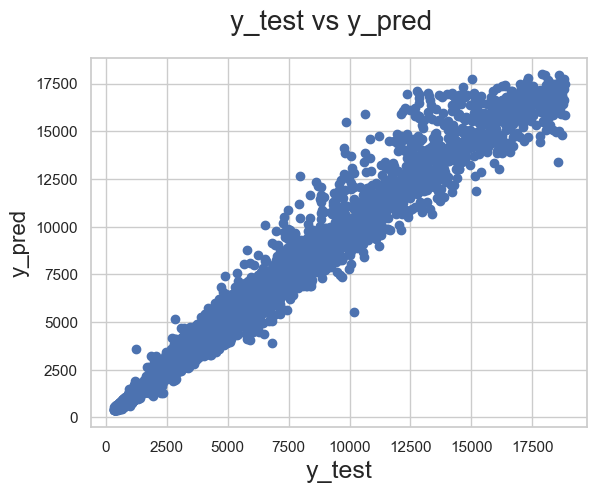

In [134]:
model_3= RandomForestRegressor(n_estimators=1000, max_features='auto', max_depth=15 ,min_samples_leaf=3, random_state=1)
classify(model_3)

#R^2 :  0.9823659845237842
#MAE : 276.2505262058506
#MSE : 282707.66969492676
#RMSE: 531.7026139628493

R^2 :  0.982803999075019
MAE : 274.8883404573836
MSE : 275685.44193068973
RMSE: 525.0575605880651


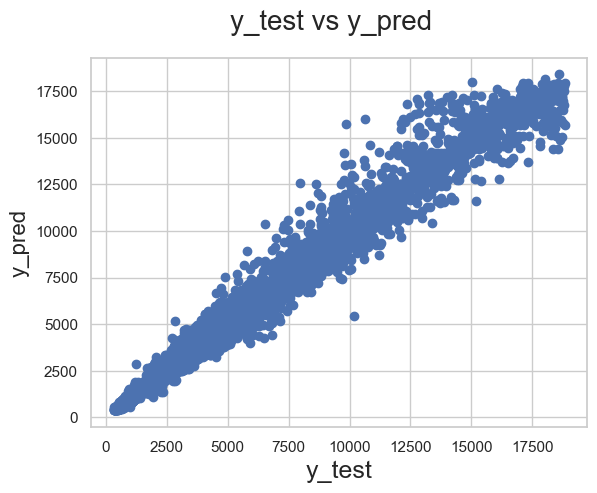

In [135]:
model_3A = RandomForestRegressor()
classify(model_3A)

## R^2 :  0.982803999075019
## MAE : 274.8883404573836
## MSE : 275685.44193068973
## RMSE: 525.0575605880651

# Model 4

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


# Create a gradient boosting regressor object
gb_regressor = GradientBoostingRegressor(random_state=42)

param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.05, 0.1, 0.2]}


# Define the grid search object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

R^2 :  0.9597128274786486
MAE : 454.1738805369226
MSE : 645881.9704151037
RMSE: 803.6678234289984


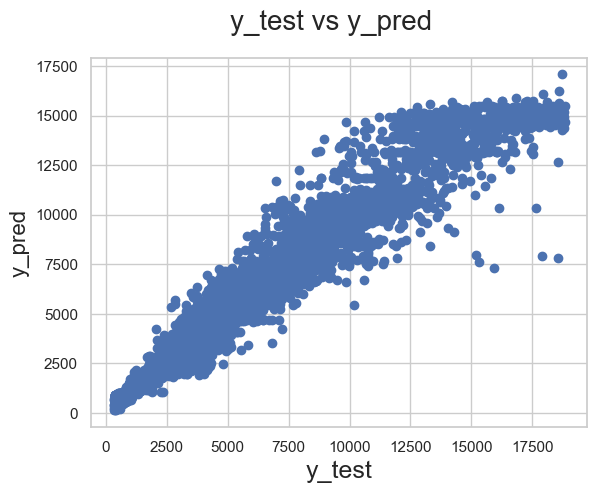

In [136]:
# tune your model according to hyperparameters above
model_4= GradientBoostingRegressor(learning_rate = 0.05, n_estimators=100, max_depth=3)
classify(model_4)

## R^2 :  0.9597128274786486
## MAE : 454.1738805369226
## MSE : 645881.9704151037
## RMSE: 803.6678234289984

# Model 5

In [ ]:
# Create instance of MLPRegressor
mlp = MLPRegressor(random_state=1)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10,10), (50,50), (100,100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create GridSearchCV instance
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV to data
grid_search.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

R^2 :  0.9458955768741352
MAE : 505.5279730355726
MSE : 867399.4532176703
RMSE: 931.3428226049043


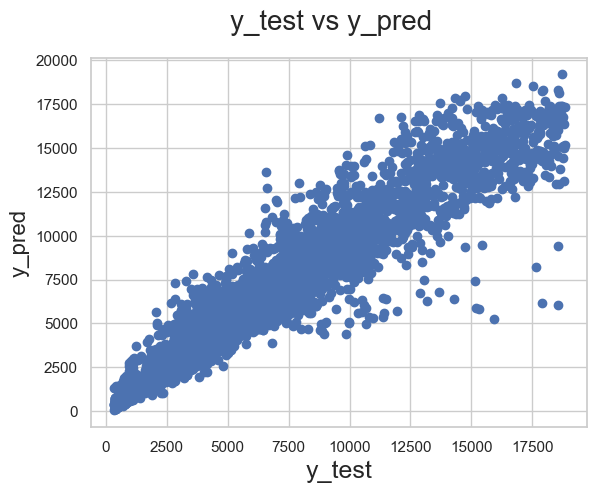

In [137]:
model_5= MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=500, learning_rate = 'constant',random_state=1)
classify(model_5)

## R^2 :  0.9458955768741352
## MAE : 505.5279730355726
## MSE : 867399.4532176703
## RMSE: 931.3428226049043
 

# DATASET D

In [138]:
X = diamonds_D.drop(['price'],axis=1)
y = diamonds_D['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42077, 7), (10520, 7), (42077,), (10520,))

# Model 1

R^2 :  0.8711769478159798
MAE : 881.7086727592429
MSE : 1630858.4583098872
RMSE: 1277.050687447404


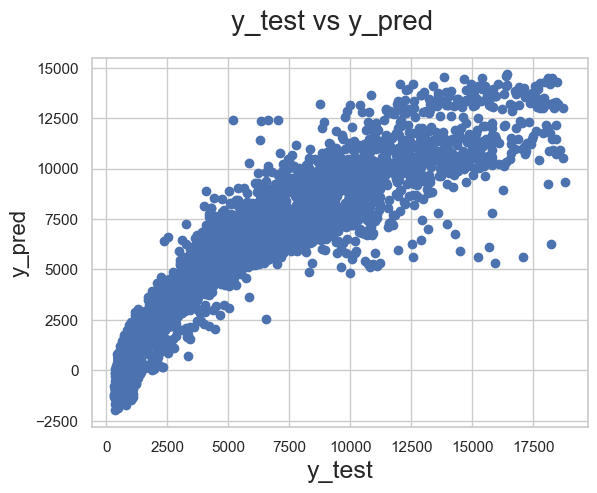

In [194]:
model_1 = LinearRegression()
classify(model_1)

# Model 2

In [117]:
# Define the grid of hyperparameters to search over
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

dt_regressor = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_dt_regressor = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the data
grid_dt_regressor.fit(X, y)

# Print the best parameters and score
print("Best parameters: ", grid_dt_regressor.best_params_)
print("Best score: ", grid_dt_regressor.best_score_)

NameError: name 'dt_regressor' is not defined

R^2 :  0.9695383977428981
MAE : 315.3517902408111
MSE : 384761.5740995986
RMSE: 620.291523478758


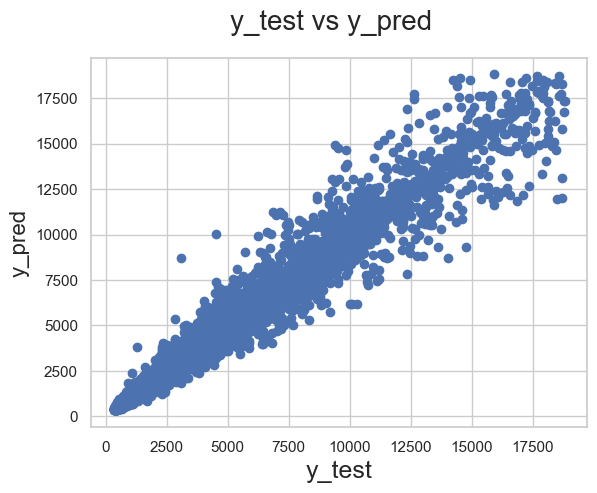

In [139]:
from sklearn.tree import DecisionTreeRegressor
model_2= DecisionTreeRegressor(random_state = 1)

# Call the classify() function
classify(model_2)

## R^2 :  0.9695383977428981
## MAE : 315.3517902408111
## MSE : 384761.5740995986
## RMSE: 620.291523478758

# Model 3

In [ ]:
param_grid = { 
   'n_estimators': [500, 1000, 5000],
    'max_features': ['auto', 'sqrt', 'log2'],
    #to save time in updating the notebook, max_depth is also left out
    #'max_depth' : [10, 15, 20],
    'criterion' :['squared_error', 'absolute_error', 'friedman_mse']
}

# Create a Random Forest regressor instance
rf_regressor = RandomForestRegressor(random_state=42)

# Create GridSearchCV instance with the regressor and parameter grid
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

R^2 :  0.9822943582878317
MAE : 250.0899022619391
MSE : 223640.58587985465
RMSE: 472.9065297496479


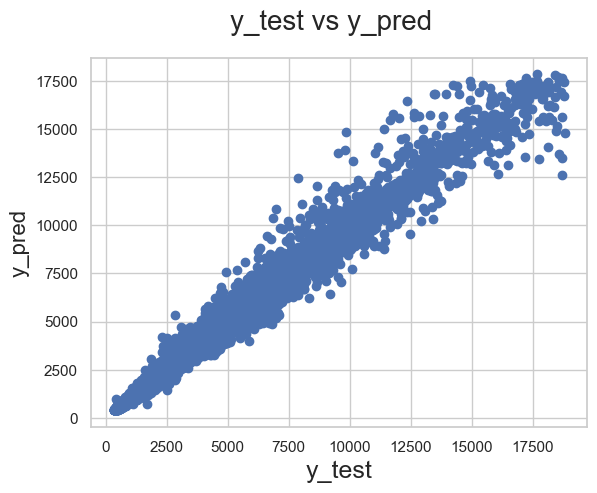

In [140]:
model_3= RandomForestRegressor(n_estimators=1000, max_features='auto', max_depth=15 ,min_samples_leaf=3, random_state=1)
classify(model_3)

#R^2 :  0.9822943582878317
#MAE : 250.0899022619391
#MSE : 223640.58587985465
#RMSE: 472.9065297496479


R^2 :  0.9821755386884446
MAE : 250.2430968280373
MSE : 225141.4004367577
RMSE: 474.4906747626951


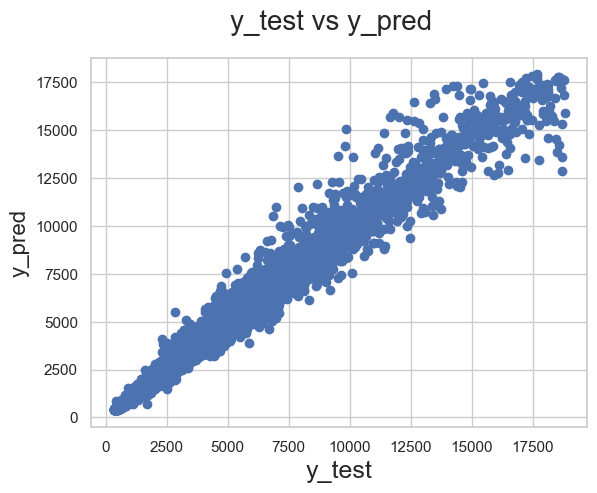

In [141]:
model_3A = RandomForestRegressor()
classify(model_3A)

## R^2 :  0.9821755386884446
## MAE : 250.2430968280373
## MSE : 225141.4004367577
## RMSE: 474.4906747626951

# Model 4

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


# Create a gradient boosting regressor object
gb_regressor = GradientBoostingRegressor(random_state=42)

param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.05, 0.1, 0.2]}


# Define the grid search object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

R^2 :  0.9558079622501803
MAE : 413.28626373894946
MSE : 558191.1898060222
RMSE: 747.1219377089808


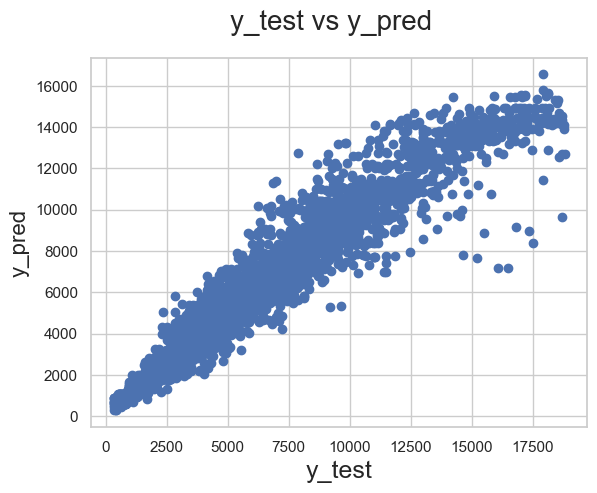

In [142]:
# tune your model according to hyperparameters above
model_4= GradientBoostingRegressor(learning_rate = 0.05, n_estimators=100, max_depth=3)
classify(model_4)

# Model 5

In [ ]:
# Create instance of MLPRegressor
mlp = MLPRegressor(random_state=1)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10,10), (50,50), (100,100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create GridSearchCV instance
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV to data
grid_search.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 :  0.9750402845722826
MAE : 319.3989331975858
MSE : 315267.0472154025
RMSE: 561.4864621835529


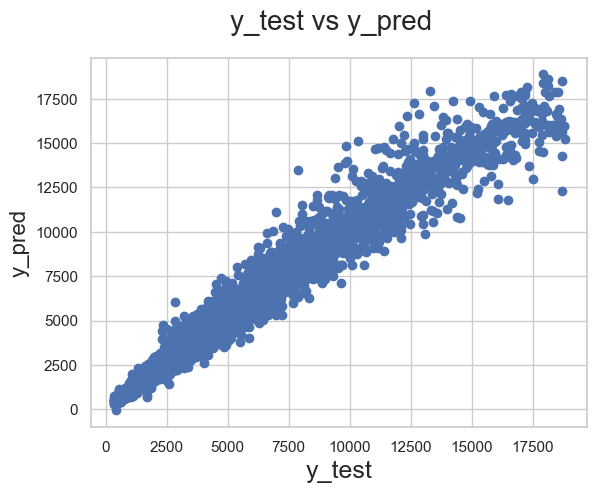

In [143]:
model_5= MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=500, learning_rate = 'constant',random_state=1)
classify(model_5)

## R^2 :  0.9750402845722826
## MAE : 319.3989331975858
## MSE : 315267.0472154025
## RMSE: 561.4864621835529

# Metrics with ori dataset (Only dropping dimensionless diamonds + combining xyz)

In [144]:
diamonds_oriset = pd.read_csv("diamonds.csv")
diamonds_ori.head()

,carat,cut,color,clarity,depth,table,price,dimensions
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,38.202030
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,34.505856
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,38.076885
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,46.724580
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,51.917250


In [145]:
# Rename "'x'" to "a" to avoid confusing
diamonds_oriset.rename (columns = {"'x'" : "a"}, inplace = True)
diamonds_oriset.rename (columns = {"'z'" : "z"}, inplace = True)
diamonds_oriset.rename (columns = {"'y'" : "y"}, inplace = True)

In [146]:
# Dropping "0" / dimentionless diamonds 
diamonds_oriset = diamonds_oriset.drop(diamonds_oriset[diamonds_oriset["a"]==0].index)
diamonds_oriset = diamonds_oriset.drop(diamonds_oriset[diamonds_oriset["y"]==0].index)
diamonds_oriset = diamonds_oriset.drop(diamonds_oriset[diamonds_oriset["z"]==0].index)

print("Original Shape (Row x Column)                    : ", diamonds_ori.shape) 
print("After Dropping Dimentionless Shape (Row x Column): ", diamonds_oriset.shape)

Original Shape (Row x Column)                    :  (53940, 8)
After Dropping Dimentionless Shape (Row x Column):  (53920, 10)


In [147]:
# Combined Dimension by multiplying x, y, z values
# Combined Dimenesion = Volume

# 'x' = Length
# 'y' = Width
# 'z' = Height
diamonds_oriset['dimensions'] = diamonds_oriset['a'] * diamonds_oriset['y'] * diamonds_oriset['z']

In [148]:
# Find column with categorical data
s = (diamonds_oriset.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [149]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    diamonds_oriset[col] = label_encoder.fit_transform(diamonds_oriset[col])
diamonds_oriset.head()

,carat,cut,color,clarity,depth,table,price,a,y,z,dimensions
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75,51.917250


In [150]:
diamonds_oriset = diamonds_oriset.drop(['a', 'y', 'z'], axis=1)

In [151]:
X = diamonds_oriset.drop(['price'],axis=1)
y = diamonds_oriset['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43136, 7), (10784, 7), (43136,), (10784,))

In [152]:
X_train.head()

,carat,cut,color,clarity,depth,table,dimensions
50176,0.55,2,1,4,61.5,56.0,90.154296
17688,1.30,3,0,3,60.2,59.0,208.750500
38203,0.43,3,4,5,61.9,55.0,71.755200
1826,0.72,4,2,4,62.1,59.0,115.945130
34543,0.43,4,1,5,62.2,58.0,70.508347


In [153]:
def classify(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("MSE :", mean_squared_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    #EVALUATION OF THE MODEL
    #Plotting y_test and y_pred 
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
    plt.xlabel('y_test',fontsize=18)                          # X-label
    plt.ylabel('y_pred',fontsize=16)

# Model 2

R^2 :  0.9656469893538393
MAE : 357.223015578635
MSE : 550745.7787978074
RMSE: 742.1224823422394


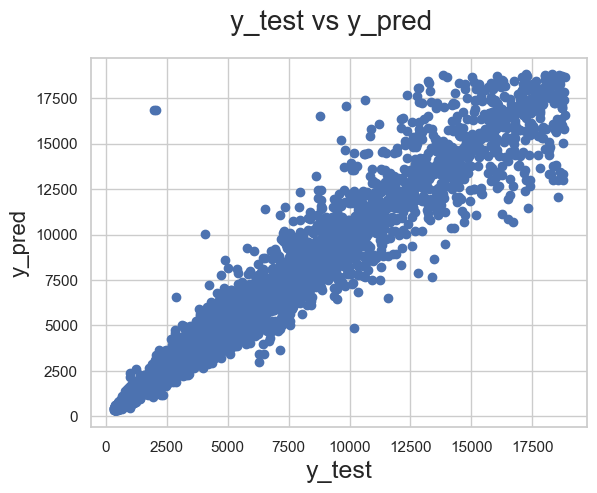

In [154]:
from sklearn.tree import DecisionTreeRegressor
model_2= DecisionTreeRegressor(random_state = 1)

# Call the classify() function
classify(model_2)

## R^2 :  0.9656469893538393
## MAE : 357.223015578635
## MSE : 550745.7787978074
## RMSE: 742.1224823422394

# Model 3

R^2 :  0.979836976632384
MAE : 277.69874875233495
MSE : 323252.59995100804
RMSE: 568.5530757554725


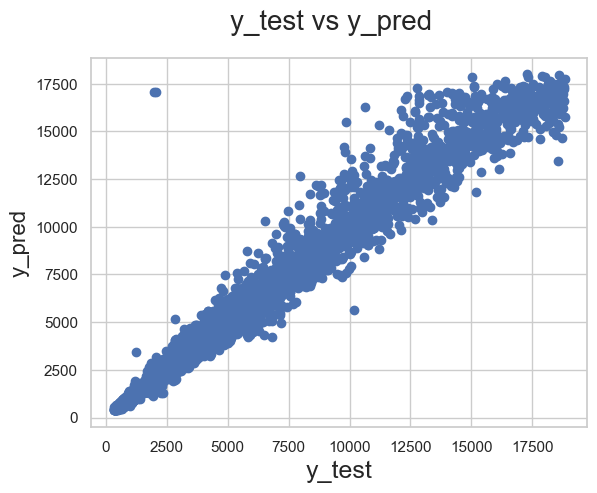

In [155]:
model_3= RandomForestRegressor(n_estimators=1000, max_features='auto', max_depth=15 ,min_samples_leaf=3, random_state=1)
classify(model_3)

# Oriset (No DataPreprocessing)
#R^2 :  0.979836976632384
#MAE : 277.69874875233495
#MSE : 323252.59995100804
#RMSE: 568.5530757554725

R^2 :  0.980376717414763
MAE : 275.42434969254595
MSE : 314599.5022472262
RMSE: 560.8917027798024


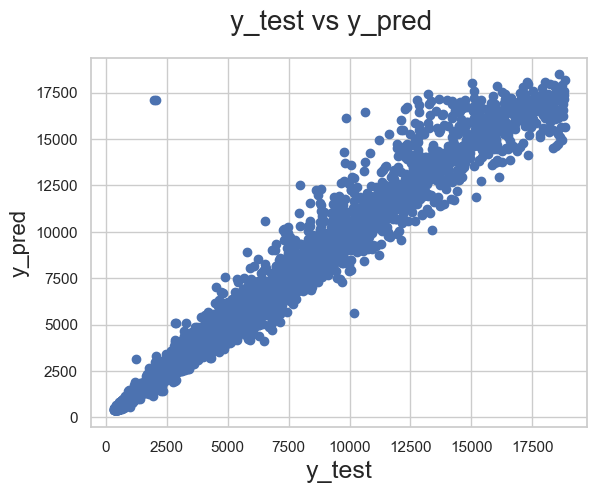

In [159]:
model_3A= RandomForestRegressor(random_state=1)
classify(model_3A)

## R^2 :  0.980376717414763
## MAE : 275.42434969254595
## MSE : 314599.5022472262
## RMSE: 560.8917027798024

# Model 4

R^2 :  0.957986523776166
MAE : 455.0319477067989
MSE : 673557.9865540746
RMSE: 820.7057856223962


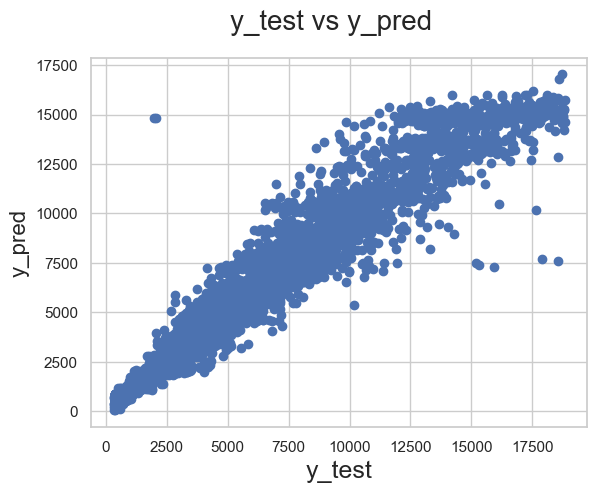

In [156]:
# tune your model according to hyperparameters above
model_4= GradientBoostingRegressor(learning_rate = 0.05, n_estimators=100, max_depth=3)
classify(model_4)

## R^2 :  0.957986523776166
## MAE : 455.0319477067989
## MSE : 673557.9865540746
## RMSE: 820.7057856223962

# Model 5

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 :  0.9596117494420661
MAE : 466.6275933560881
MSE : 647502.4485312841
RMSE: 804.6753684134268


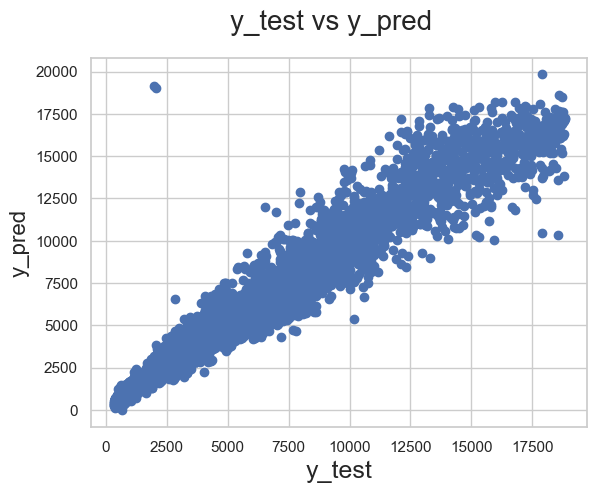

In [157]:
model_5= MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=500, learning_rate = 'constant',random_state=1)
classify(model_5)

## R^2 :  0.9596117494420661
## MAE : 466.6275933560881
## MSE : 647502.4485312841
## RMSE: 804.6753684134268